In [1]:
import pandas as pd
import csv
import numpy as np
from collections import Counter
import re
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import pickle

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [3]:
clusters = {}
organizations_list = []
people_list = []

In [4]:
take_sample = False
sample_size = 0.05

In [5]:
vanilla_data = 'vanilla'
clustering_data = 'clustering'
regression_data = 'regression'
folders = [vanilla_data, clustering_data, regression_data]

In [6]:
def select_k(data):
    kmeanModel = KMeans()
    r = [i for i in range (20, 100, 10)]
    print(r)
    visualizer = KElbowVisualizer(kmeanModel, k=r, timings=False)
    visualizer.fit(data)
    k = visualizer.show()
    
def dump_clusters(kmeans, data, suffix):
    for i in range(kmeans.n_clusters):
        cluster_data = data[np.where(kmeans.labels_ == i)].ravel()
        min_ = np.min(cluster_data)
        max_ = np.max(cluster_data)
        clusters['cluster-{}-{}'.format(i, suffix)] = [kmeans.cluster_centers_[i].squeeze().tolist(), min_, max_]

### Organizations

In [7]:
org = pd.read_csv("data/organizations.csv")
org.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits'],
      dtype='object')

In [8]:
org = org[org["name"].notna()]
org["idslice"] = org["uuid"].apply(lambda x: x[-5:])
org["name_id"] = org["name"] + "@" + org["idslice"]
org["name_id"] = org["name_id"].apply(lambda x: "_".join(x.split()))
print("name_id unique? ", len(org["name_id"].unique()) == len(org))
if take_sample:
    org = org.loc[:int(sample_size*len(org))]
org

name_id unique?  True


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,idslice,name_id
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,143488.0,2007-05-25 13:51:27,2021-07-22 04:02:55,NaN,company,...,NaN,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,33abd,Wetpaint@33abd
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,5448.0,2007-05-26 02:30:28,2018-10-27 00:29:49,NaN,"investor,company",...,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,1.0,7efc7,Zoho@7efc7
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,15055.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,553d0,Digg@553d0
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,144529.0,2007-05-26 03:21:34,2019-06-19 12:17:48,NaN,investor,...,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,45.0,a8eec,Omidyar_Network@a8eec
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,11.0,2007-05-26 04:22:15,2021-10-11 11:59:53,"Facebook, Inc.","investor,company",...,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,04fbb,Facebook@04fbb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642158,9ed8a203-c5a0-496a-adda-25a0cbb90fb3,McGuire Memorial,organization,mcguire-memorial,https://www.crunchbase.com/organization/mcguir...,NaN,2021-10-27 23:43:28,2021-10-27 23:43:28,McGuire Memorial,company,...,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,McGuire,NaN,NaN,company,NaN,90fb3,McGuire_Memorial@90fb3
1642159,a8b940d2-89f3-46f9-80ed-69cf4ceea3ac,Success Chain,organization,success-chain,https://www.crunchbase.com/organization/succes...,NaN,2021-10-27 23:52:38,2021-10-27 23:52:38,NaN,company,...,https://www.linkedin.com/company/success-chain/,https://twitter.com/GetSuccessChain,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,ea3ac,Success_Chain@ea3ac
1642160,ffc73558-8701-4530-ae8b-293eabf9a7b8,Capital Estate,organization,capital-estate,https://www.crunchbase.com/organization/capita...,NaN,2021-10-27 23:54:06,2021-10-27 23:54:06,NaN,company,...,https://www.linkedin.com/company/capital-estat...,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,9a7b8,Capital_Estate@9a7b8
1642161,440cc557-5891-4b6b-935a-d90569cff9d8,FABAY,organization,fabay,https://www.crunchbase.com/organization/fabay,NaN,2021-10-27 23:58:31,2021-10-27 23:58:31,FABAY AS.,company,...,https://www.linkedin.com/company/fabay/,https://twitter.com/fabaylife,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,ff9d8,FABAY@ff9d8


In [9]:
orgs = set(org['name_id'])

### People

In [10]:
people = pd.read_csv("data/people.csv")
people = people.dropna(subset=['name', 'gender', 'country_code'], how='any')
people.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,...,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,7876.0,2007-05-25 14:03:54,2021-03-25 03:59:21,Ben,Elowitz,...,WA,Washington,Seattle,cf253887-5eac-21a2-28d3-47db7311f7e9,Madrona Venture Group,Managing Director,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,2497.0,2007-05-26 02:33:03,2021-02-16 10:41:17,Raju,Vegesna,...,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,NaN,https://www.linkedin.com/in/raju-vegesna-78a6541/,NaN,https://res.cloudinary.com/crunchbase-producti...
6,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,1083.0,2007-05-26 04:51:46,2021-10-23 05:57:44,Mark,Zuckerberg,...,CA,California,Palo Alto,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,Founder and CEO,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...
7,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin Moskovitz,person,dustin-moskovitz,https://www.crunchbase.com/person/dustin-mosko...,719.0,2007-05-26 05:15:05,2019-06-07 20:29:51,Dustin,Moskovitz,...,CA,California,San Francisco,c2d47d05-9e78-de77-084c-dd5171251ff1,Asana,CEO & Co-Founder,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,https://res.cloudinary.com/crunchbase-producti...
8,d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen Van Natta,person,owen-van-natta,https://www.crunchbase.com/person/owen-van-natta,1485.0,2007-05-26 05:15:59,2020-12-04 18:38:46,Owen,Van Natta,...,CA,California,San Francisco,a08dd843-1fd4-458c-89c5-d09576679836,Prefix Capital,Founder and Managing Partner,NaN,https://www.linkedin.com/in/owen-van-natta-444a7/,NaN,https://res.cloudinary.com/crunchbase-producti...


In [11]:
people.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'first_name', 'last_name', 'gender', 'country_code',
       'state_code', 'region', 'city', 'featured_job_organization_uuid',
       'featured_job_organization_name', 'featured_job_title', 'facebook_url',
       'linkedin_url', 'twitter_url', 'logo_url'],
      dtype='object')

In [12]:
people["idslice"] = people["uuid"].apply(lambda x: x[-5:])
people["name"] = people["name"].apply(lambda x: "_".join(x.split()))
people["name_id"] = people["name"] + "@" + people["idslice"]
print("total number of people:", len(people))
print("total number of unique name_id's:", len(people["name_id"].unique()))
if take_sample:
    people = people.loc[:int(sample_size*len(people))]
people

total number of people: 701699
total number of unique name_id's: 701699


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,...,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url,idslice,name_id
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben_Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,7876.0,2007-05-25 14:03:54,2021-03-25 03:59:21,Ben,Elowitz,...,Seattle,cf253887-5eac-21a2-28d3-47db7311f7e9,Madrona Venture Group,Managing Director,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...,37a71,Ben_Elowitz@37a71
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju_Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,2497.0,2007-05-26 02:33:03,2021-02-16 10:41:17,Raju,Vegesna,...,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,NaN,https://www.linkedin.com/in/raju-vegesna-78a6541/,NaN,https://res.cloudinary.com/crunchbase-producti...,277e0,Raju_Vegesna@277e0
6,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark_Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,1083.0,2007-05-26 04:51:46,2021-10-23 05:57:44,Mark,Zuckerberg,...,Palo Alto,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,Founder and CEO,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...,03f22,Mark_Zuckerberg@03f22
7,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin_Moskovitz,person,dustin-moskovitz,https://www.crunchbase.com/person/dustin-mosko...,719.0,2007-05-26 05:15:05,2019-06-07 20:29:51,Dustin,Moskovitz,...,San Francisco,c2d47d05-9e78-de77-084c-dd5171251ff1,Asana,CEO & Co-Founder,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,https://res.cloudinary.com/crunchbase-producti...,2cd64,Dustin_Moskovitz@2cd64
8,d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen_Van_Natta,person,owen-van-natta,https://www.crunchbase.com/person/owen-van-natta,1485.0,2007-05-26 05:15:59,2020-12-04 18:38:46,Owen,Van Natta,...,San Francisco,a08dd843-1fd4-458c-89c5-d09576679836,Prefix Capital,Founder and Managing Partner,NaN,https://www.linkedin.com/in/owen-van-natta-444a7/,NaN,https://res.cloudinary.com/crunchbase-producti...,94e53,Owen_Van_Natta@94e53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271512,29a59af3-cc77-434e-b904-278821f63faa,Adnan_Kharuf,person,adnan-kharuf-3faa,https://www.crunchbase.com/person/adnan-kharuf...,NaN,2021-10-27 22:40:08,2021-10-27 22:40:08,Adnan,Kharuf,...,Fremont,NaN,NaN,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,63faa,Adnan_Kharuf@63faa
1271513,d3361d27-8000-4b9d-9131-e2e606e51efe,Natalie_Paul,person,natalie-paul-1efe,https://www.crunchbase.com/person/natalie-paul...,NaN,2021-10-27 22:52:51,2021-10-27 22:52:51,Natalie,Paul,...,NaN,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/natalie-paul-9a42a3b/,NaN,NaN,51efe,Natalie_Paul@51efe
1271514,dfd74cfe-dc92-4cee-bdb4-1022152f9b92,Armani_Liao,person,armani-liao,https://www.crunchbase.com/person/armani-liao,NaN,2021-10-27 23:10:05,2021-10-27 23:10:05,Armani,Liao,...,Taipei,NaN,NaN,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,f9b92,Armani_Liao@f9b92
1271515,c58387eb-7d26-463a-8026-98d6d0dd4542,Fred_Chien,person,fred-chien-4542,https://www.crunchbase.com/person/fred-chien-4542,NaN,2021-10-27 23:10:05,2021-10-27 23:10:05,Fred,Chien,...,Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d4542,Fred_Chien@d4542


In [13]:
people_names = set(people["name_id"])
combined = set()
combined = combined.union(people_names)
combined = combined.union(orgs)

In [14]:
jobs = pd.read_csv("data/jobs.csv")
jobs = jobs.dropna(subset=['is_current', 'person_name', 'org_name', 'title'], how='any')
jobs["idslice"] = jobs["person_uuid"].apply(lambda x: x[-5:])
jobs["person_name"] = jobs["person_name"].apply(lambda x: "_".join(x.split()))
jobs["person_name"] = jobs["person_name"] + "@" + jobs["idslice"]
jobs["idslice"] = jobs["org_uuid"].apply(lambda x: x[-5:])
jobs["org_name"] = jobs["org_name"].apply(lambda x: "_".join(x.split()))
jobs["org_name"] = jobs["org_name"] + "@" + jobs["idslice"]
jobs

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type,idslice
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben_Elowitz@37a71,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint@33abd,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive,33abd
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin_Flaherty@64763,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint@33abd,NaN,NaN,False,VP Marketing,executive,33abd
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju_Vegesna@277e0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho@7efc7,2000-11-01,NaN,True,Chief Evangelist,employee,7efc7
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian_Wenig@2d1b0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho@7efc7,2006-03-01,NaN,True,VP Business Development,executive,7efc7
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay_Adelson@dc968,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg@553d0,2005-07-01,2010-04-05,False,CEO,executive,553d0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941160,6ea8e79f-47be-4335-a9c3-45c886476bb6,Jocelyn Lehman Associate @ Rachel Zoe Ventures,job,jocelyn-lehman-7c71-employee-rachel-zoe-ventur...,https://www.crunchbase.com/job/jocelyn-lehman-...,NaN,2021-10-27 23:21:16,2021-10-27 23:21:16,d9dba2c1-16cd-49f2-ada5-ffee47a57c71,Jocelyn_Lehman@57c71,bc12f230-284d-49f2-a436-fbc2b509924c,Rachel_Zoe_Ventures@9924c,NaN,NaN,True,Associate,employee,9924c
1941161,0ae55e9b-3554-4cf9-ba63-930e0178c648,Michael Gebert Chairman @ European Blockchain ...,job,michael-michael-gebert-employee-european-block...,https://www.crunchbase.com/job/michael-michael...,NaN,2021-10-27 23:21:37,2021-10-27 23:21:37,97da0d42-3108-8cbc-ddc8-3fdb99bc40e0,Michael_Gebert@c40e0,6fae4fff-5ff4-4a7d-af8d-74c48365f550,European_Blockchain_Association@5f550,2018-10-01,NaN,True,Chairman,employee,5f550
1941162,8859cf08-fc6d-4b74-a6db-7b4c3c34fbb3,Marc Liebe Founder @ SoULuvMuziq,job,marc-liebe-executive-souluvmuziq--8859cf08,https://www.crunchbase.com/job/marc-liebe-exec...,NaN,2021-10-27 23:43:08,2021-10-27 23:43:08,f90264dd-e9db-d759-d12c-2c2309c04a1a,Marc_Liebe@04a1a,a86f9d4f-3ab8-4b9a-807e-aea7de4a121d,SoULuvMuziq@a121d,2016-09-01,NaN,True,Founder,executive,a121d
1941163,b4b4f72a-bcbe-465c-beb3-a4173dd7cd26,Sue Nabeth Moore Co-Founder @ Success Chain,job,sue-nabeth-moore-employee-success-chain--b4b4f72a,https://www.crunchbase.com/job/sue-nabeth-moor...,NaN,2021-10-27 23:52:38,2021-10-27 23:52:38,86817e2d-068e-4317-a68e-44f926ddbea6,Sue_Nabeth_Moore@dbea6,a8b940d2-89f3-46f9-80ed-69cf4ceea3ac,Success_Chain@ea3ac,2020-11-01,NaN,True,Co-Founder,employee,ea3ac


In [15]:
employees = jobs.loc[jobs['job_type'] == 'employee']
employees = employees[employees['person_name'].isin(people_names)]
employees = employees[employees['org_name'].isin(orgs)]

In [16]:
current_employees = employees.loc[employees['is_current'] == True]
current_employees = pd.DataFrame(current_employees[["person_name", "org_name"]])
current_employees.insert(1, "relation", "is_employee_of")
current_employees

,person_name,relation,org_name
2,Raju_Vegesna@277e0,is_employee_of,Zoho@7efc7
613,Tim_Dilley@b74c8,is_employee_of,NetSuite@aab2c
796,Barry_Diller@b9213,is_employee_of,IAC@5bec4
952,Robert_Wood@b789a,is_employee_of,Akamai_Technologies@2bda5
1047,Jeffrey_Blackburn@1d7d8,is_employee_of,Amazon@f10c4
...,...,...,...
1941081,Bülent_Arslan@3bd21,is_employee_of,Gap@6adac
1941097,Nick_Stevens@09586,is_employee_of,Replica@3287f
1941105,Frédéric_PINTO-BICHO@aa9a2,is_employee_of,Technology_and_Strategy@4a760
1941161,Michael_Gebert@c40e0,is_employee_of,European_Blockchain_Association@5f550


In [17]:
for f in folders:
    current_employees.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [18]:
former_employees = employees.loc[employees['is_current'] == False]
former_employees = pd.DataFrame(former_employees[["person_name", "org_name"]])
former_employees.insert(1, "relation", "was_employee_of")
former_employees

,person_name,relation,org_name
9,Owen_Van_Natta@94e53,was_employee_of,Facebook@04fbb
53,Kieran_Hannon@bf559,was_employee_of,Helio@84f65
54,Ali_Zanjani@acced,was_employee_of,Helio@84f65
62,Niklas_Zennström@90d8f,was_employee_of,eBay@2dcb1
70,Jocelyn_Ding@5d3a6,was_employee_of,Postini@67203
...,...,...,...
1941078,James_Buckley@ce070,was_employee_of,Duologi@07e13
1941089,Austin_Walker_-_TV@ef640,was_employee_of,KOMU_8_News@c4e80
1941090,Austin_Walker_-_TV@ef640,was_employee_of,KVOA-TV@01a98
1941115,Vicki_Peng@a4968,was_employee_of,Index_Ventures@4a1ab


In [19]:
for f in folders:
    former_employees.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [20]:
organizations_list.extend(list(set(employees['org_name'])))
people_list.extend(list(set(employees['person_name'])))

In [21]:
executives = jobs.loc[jobs['job_type'] != 'employee']
executives = executives[executives['person_name'].isin(people_names)]
executives = executives[executives['org_name'].isin(orgs)]
people_list.extend(list(set(executives['person_name'])))
organizations_list.extend(list(set(executives['org_name'])))

In [22]:
jobs_dict = Counter(executives['title'])
jobs_dict.most_common(200)

[('CEO', 47446),
 ('Founder', 41846),
 ('Board Member', 36397),
 ('Co-Founder', 28916),
 ('Advisor', 22277),
 ('Founder & CEO', 19761),
 ('Member of the Board of Directors', 17978),
 ('Director', 15978),
 ('CTO', 15038),
 ('Managing Director', 13898),
 ('Partner', 12303),
 ('President', 11523),
 ('Chief Executive Officer', 10325),
 ('Founder and CEO', 9050),
 ('CFO', 8678),
 ('Board of Directors', 8480),
 ('COO', 8472),
 ('Co-Founder & CEO', 8417),
 ('Co-founder', 7383),
 ('Chief Financial Officer', 6734),
 ('Chief Operating Officer', 5923),
 ('Vice President', 5643),
 ('CEO & Founder', 5547),
 ('Managing Partner', 5506),
 ('President & CEO', 5413),
 ('Chief Technology Officer', 5008),
 ('Board Observer', 4886),
 ('Investor', 4702),
 ('Chairman', 4674),
 ('Principal', 4345),
 ('CEO & Co-Founder', 4012),
 ('Co-Founder and CEO', 3677),
 ('Co-Founder & CTO', 3515),
 ('CMO', 3140),
 ('Mentor', 3057),
 ('Chairman of the Board of Directors', 2920),
 ('President and CEO', 2772),
 ('Chairman o

# Rules
- chairman, any combimnation of boar and director or board and member -> board_member_of (was/is) 
- chief operating officer, coo -> coo_of (was/is)
- chief financial officer, cfo -> cfo_of (was/is)
- chief executive officer, ceo -> ceo_of (was/is)
- chief revenue officer, cro -> cro_of (was/is)
- chief people officer, cpo -> cpo_of (was/is)
- chief security officer, cso -> cso_of (was/is) 
- chief business officer, cbo -> cbo_of (was/is)
- chief technology offcier, cto -> cto_of (was/is)
- chief information officer, cio -> cio_of (was/is)
- founding partner, founder, co-founder, co founder, cofounder -> founder_of (was/is)
- owner -> owner_of (was/is)
- advisor -> advisor_of (was/is)
- director -> director_of (was/is)
- vice president, vp -> vp_of (was/is)
- president -> president_of (was/is)

In [23]:
executive_jobs = {'president_of' : ['president'],
                  'vp_of' : ['vice president', 'vp'],
                  'founder_of' : ['founding partner', 'founder', 'co-founder', 'co founder', 'cofounder'],
                  'owner_of' : ['owner'],
                  'advisor_of' : ['advisor'],
                  'director_of' : ['director'],
                  'coo_of' : ['chief operating officer', 'coo'],
                  'cfo_of' : ['chief financial officer', 'cfo'], 
                  'ceo_of' : ['chief executive officer', 'ceo'],
                  'cro_of' : ['chief revenue officer', 'cro'],
                  'cpo_of' : ['chief people officer', 'cpo'],
                  'cso_of' : ['chief security officer', 'cso'], 
                  'cbo_of' : ['chief business officer', 'cbo'],
                  'cto_of' : ['chief technology offcier', 'cto'],
                  'cio_of' : ['hief information officer', 'cio'],
                  'board_member_of' : ['chairman','boar director','board member']
                 }

In [24]:
executives_people = []

In [25]:
def write_employees(df_, k, is_current):
    ex_employees = tmp.loc[tmp['is_current'] == is_current]
    ex_employees = pd.DataFrame(ex_employees[["person_name", "org_name"]])
    prefix = 'was' if is_current == False else 'is'
    ex_employees.insert(1, "relation", "{}_{}". format(prefix, k))
    for f in folders:
        ex_employees.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
    executives_people.extend(list(set(ex_employees['person_name'])))
    
for k,v in executive_jobs.items():
    tmp = executives[executives['title'].str.contains('|'.join(v), flags=re.IGNORECASE, regex=True)]
    write_employees(tmp, k, True)
    write_employees(tmp, k, False)

In [26]:
executives_people = set(executives_people)

In [27]:
rest_executives = executives[~executives['person_name'].isin(executives_people)]

In [28]:
current_rest_executives = rest_executives.loc[rest_executives['is_current'] == True]
current_rest_executives = pd.DataFrame(current_rest_executives[["person_name", "org_name"]])
current_rest_executives.insert(1, "relation", "is_executive_of")
current_rest_executives

,person_name,relation,org_name
3221,Kimberly_Coleman@a4be3,is_executive_of,WineLog.net@387a8
3385,Jim_Flach@03b44,is_executive_of,Accel@7bf36
3435,Kui_Zhou@29ff9,is_executive_of,Sequoia_Capital@55f91
3585,David_Hansson@db767,is_executive_of,Basecamp@b7336
4304,Jerome_Misso@aad45,is_executive_of,Balderton_Capital@bccad
...,...,...,...
1941006,Ronald_Hanson@2cf47,is_executive_of,Indrio_Technologies@0e1e7
1941027,Mikheil_Didebulidze@3cc0c,is_executive_of,Tribe-V@16010
1941052,Elisa_Fernanda_Alanís@aab63,is_executive_of,Fitzer_Premium_Hard_Seltzer@a41ec
1941056,Abril_Nava@8873f,is_executive_of,Fitzer_Premium_Hard_Seltzer@a41ec


In [29]:
for f in folders:
    current_rest_executives.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [30]:
former_rest_executives = rest_executives.loc[rest_executives['is_current'] == False]
former_rest_executives = pd.DataFrame(former_rest_executives[["person_name", "org_name"]])
former_rest_executives.insert(1, "relation", "was_executive_of")
former_rest_executives

,person_name,relation,org_name
637,Ron_Belt@c323c,was_executive_of,Lowland_Capital_Partners@01e15
745,Michael_Perlis@8350a,was_executive_of,SoftBank_Group@ce02c
2748,Richard_Brindley@e74ab,was_executive_of,Vibrant_Media@a375a
3646,Tris_Hussey@2403d,was_executive_of,b5media@2a7f7
3818,Michael_Strickman@795de,was_executive_of,ChoiceStream@e6a87
...,...,...,...
1936540,Alfred_Simpson@dbb5f,was_executive_of,Homesome@0f57b
1938498,Christopher_Robin_Nordmo@32f6e,was_executive_of,Norwegian_Armed_Forces@de97c
1938521,Christopher_Robin_Nordmo@32f6e,was_executive_of,Norwegian_Armed_Forces@de97c
1939333,David_Ramos@aed7a,was_executive_of,Nest_Seekers_International@34b63


In [31]:
for f in folders:
    former_rest_executives.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

### Ipos

In [32]:
ipos = pd.read_csv("data/ipos.csv")
ipos.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,72d30ebd-53ef-2486-6c29-22785c5173ce,NaN,ipo,microsoft-ipo--72d30ebd,https://www.crunchbase.com/ipo/microsoft-ipo--...,10555.0,2008-02-09 05:25:18,2018-02-12 23:11:05,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,...,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3ad2b068-2d97-f646-0b80-1e5f3d7adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,16334.0,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,1978-01-13,NaN,NaN,NaN,NaN,NaN,NaN,300000000.0,300000000.0,USD
2,a265c6f6-4b96-4079-096a-967a37f3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,41263.0,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,2006-10-22,16.0,16.0,USD,1.600000e+08,1.600000e+08,USD,145000000.0,145000000.0,USD
3,ee426509-826e-5dd0-9309-e79c8f384904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,43883.0,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,XO Group,...,1999-12-02,NaN,NaN,NaN,NaN,NaN,NaN,35000000.0,35000000.0,USD
4,66b57372-77f0-ec5f-ca33-0175fff79b0e,NaN,ipo,bmc-software-ipo--66b57372,https://www.crunchbase.com/ipo/bmc-software-ip...,36176.0,2008-03-18 14:07:10,2020-12-09 11:02:40,ab8e5ba4-df5d-121b-93b6-eae7a0c89245,BMC Software,...,1988-08-12,NaN,NaN,NaN,6.000000e+09,6.000000e+09,USD,NaN,NaN,NaN


In [33]:
ipos["idslice"] = ipos["org_uuid"].apply(lambda x: x[-5:])
ipos["name_id"] = ipos["org_name"] + "@" + ipos["idslice"]
ipos["uuid"] = ipos["uuid"].apply(lambda x: "ipo@" + x[-5:])  # mark it as ipo
ipos["name_id"] = ipos["name_id"].apply(lambda x: "_".join(x.split()))
print(ipos.columns)
if take_sample:
    ipos = ipos.loc[:int(sample_size*len(ipos))]
ipos

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'org_uuid', 'org_name', 'org_cb_url', 'country_code',
       'state_code', 'region', 'city', 'stock_exchange_symbol', 'stock_symbol',
       'went_public_on', 'share_price_usd', 'share_price',
       'share_price_currency_code', 'valuation_price_usd', 'valuation_price',
       'valuation_price_currency_code', 'money_raised_usd', 'money_raised',
       'money_raised_currency_code', 'idslice', 'name_id'],
      dtype='object')


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code,idslice,name_id
0,ipo@173ce,NaN,ipo,microsoft-ipo--72d30ebd,https://www.crunchbase.com/ipo/microsoft-ipo--...,10555.0,2008-02-09 05:25:18,2018-02-12 23:11:05,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9ffbb,Microsoft@9ffbb
1,ipo@adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,16334.0,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,NaN,NaN,NaN,NaN,NaN,3.000000e+08,3.000000e+08,USD,f5695,The_Walt_Disney_Company@f5695
2,ipo@3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,41263.0,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,16.0,USD,1.600000e+08,1.600000e+08,USD,1.450000e+08,1.450000e+08,USD,81ba9,DivX@81ba9
3,ipo@84904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,43883.0,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,XO Group,...,NaN,NaN,NaN,NaN,NaN,3.500000e+07,3.500000e+07,USD,aa14b,XO_Group@aa14b
4,ipo@79b0e,NaN,ipo,bmc-software-ipo--66b57372,https://www.crunchbase.com/ipo/bmc-software-ip...,36176.0,2008-03-18 14:07:10,2020-12-09 11:02:40,ab8e5ba4-df5d-121b-93b6-eae7a0c89245,BMC Software,...,NaN,NaN,6.000000e+09,6.000000e+09,USD,NaN,NaN,NaN,89245,BMC_Software@89245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47110,ipo@8c41a,NaN,ipo,wework-857c-ipo--38615b77,https://www.crunchbase.com/ipo/wework-857c-ipo...,NaN,2021-10-27 11:17:16,2021-10-27 11:17:16,c5ddeb6e-6c37-4f9b-9466-33a5ac17857c,WeWork,...,10.0,USD,9.000000e+09,9.000000e+09,USD,1.300000e+09,1.300000e+09,USD,7857c,WeWork@7857c
47111,ipo@4a2a9,NaN,ipo,sab-biotherapeutics-ipo--729769bd,https://www.crunchbase.com/ipo/sab-biotherapeu...,NaN,2021-10-27 12:33:11,2021-10-27 12:33:11,f2f9fdde-532b-c181-4db7-dd317e4b986e,SAB Biotherapeutics,...,10.0,USD,3.250000e+08,3.250000e+08,USD,1.162000e+08,1.162000e+08,USD,b986e,SAB_Biotherapeutics@b986e
47112,ipo@ce494,NaN,ipo,redbox-ipo--fe06296f,https://www.crunchbase.com/ipo/redbox-ipo--fe0...,NaN,2021-10-27 13:13:00,2021-10-27 13:13:00,8d990460-9b18-6438-8a75-8168f0c3b3f2,Redbox,...,NaN,NaN,6.930000e+08,6.930000e+08,USD,1.950000e+08,1.950000e+08,USD,3b3f2,Redbox@3b3f2
47113,ipo@2417f,NaN,ipo,informatica-ipo--374a7dd8,https://www.crunchbase.com/ipo/informatica-ipo...,NaN,2021-10-27 14:00:32,2021-10-27 14:00:32,4e52dfd7-78c4-73f9-1bca-ddae550ad2c9,Informatica,...,29.0,USD,9.600000e+09,9.600000e+09,USD,8.410000e+08,8.410000e+08,USD,ad2c9,Informatica@ad2c9


In [34]:
ipos = ipos.dropna(subset=['share_price_usd', 'money_raised_usd'], how='all')
ipos = ipos[ipos['name_id'].isin(orgs)]

In [35]:
ipos

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code,idslice,name_id
1,ipo@adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,16334.0,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,NaN,NaN,NaN,NaN,NaN,3.000000e+08,3.000000e+08,USD,f5695,The_Walt_Disney_Company@f5695
2,ipo@3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,41263.0,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,16.0,USD,1.600000e+08,1.600000e+08,USD,1.450000e+08,1.450000e+08,USD,81ba9,DivX@81ba9
3,ipo@84904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,43883.0,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,XO Group,...,NaN,NaN,NaN,NaN,NaN,3.500000e+07,3.500000e+07,USD,aa14b,XO_Group@aa14b
6,ipo@9ba0a,NaN,ipo,piksel-formerly-kit-digital-ipo--d1be8921,https://www.crunchbase.com/ipo/piksel-formerly...,43045.0,2008-03-24 21:13:36,2018-08-20 10:14:55,b0c99c14-aa1d-1653-ef65-b8d8193b91a0,Piksel,...,NaN,NaN,NaN,NaN,NaN,1.500000e+07,1.500000e+07,USD,b91a0,Piksel@b91a0
11,ipo@1049c,NaN,ipo,baidu-ipo--7fddf98a,https://www.crunchbase.com/ipo/baidu-ipo--7fdd...,15842.0,2008-04-07 23:30:28,2018-02-12 22:27:48,c273424a-c118-e7ab-29a6-843775e7e6d0,Baidu,...,27.0,USD,1.173117e+08,1.173117e+08,USD,1.090909e+08,1.090909e+08,USD,7e6d0,Baidu@7e6d0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47110,ipo@8c41a,NaN,ipo,wework-857c-ipo--38615b77,https://www.crunchbase.com/ipo/wework-857c-ipo...,NaN,2021-10-27 11:17:16,2021-10-27 11:17:16,c5ddeb6e-6c37-4f9b-9466-33a5ac17857c,WeWork,...,10.0,USD,9.000000e+09,9.000000e+09,USD,1.300000e+09,1.300000e+09,USD,7857c,WeWork@7857c
47111,ipo@4a2a9,NaN,ipo,sab-biotherapeutics-ipo--729769bd,https://www.crunchbase.com/ipo/sab-biotherapeu...,NaN,2021-10-27 12:33:11,2021-10-27 12:33:11,f2f9fdde-532b-c181-4db7-dd317e4b986e,SAB Biotherapeutics,...,10.0,USD,3.250000e+08,3.250000e+08,USD,1.162000e+08,1.162000e+08,USD,b986e,SAB_Biotherapeutics@b986e
47112,ipo@ce494,NaN,ipo,redbox-ipo--fe06296f,https://www.crunchbase.com/ipo/redbox-ipo--fe0...,NaN,2021-10-27 13:13:00,2021-10-27 13:13:00,8d990460-9b18-6438-8a75-8168f0c3b3f2,Redbox,...,NaN,NaN,6.930000e+08,6.930000e+08,USD,1.950000e+08,1.950000e+08,USD,3b3f2,Redbox@3b3f2
47113,ipo@2417f,NaN,ipo,informatica-ipo--374a7dd8,https://www.crunchbase.com/ipo/informatica-ipo...,NaN,2021-10-27 14:00:32,2021-10-27 14:00:32,4e52dfd7-78c4-73f9-1bca-ddae550ad2c9,Informatica,...,29.0,USD,9.600000e+09,9.600000e+09,USD,8.410000e+08,8.410000e+08,USD,ad2c9,Informatica@ad2c9


In [36]:
# a company can have multple ipos and it is not unique, so we use uuid of ipos instead
ipo_type = pd.DataFrame(ipos[["uuid", "type"]])
ipo_type.insert(1, "relation", "type_of")
ipo_type

,uuid,relation,type
1,ipo@adfc4,type_of,ipo
2,ipo@3da2b,type_of,ipo
3,ipo@84904,type_of,ipo
6,ipo@9ba0a,type_of,ipo
11,ipo@1049c,type_of,ipo
...,...,...,...
47110,ipo@8c41a,type_of,ipo
47111,ipo@4a2a9,type_of,ipo
47112,ipo@ce494,type_of,ipo
47113,ipo@2417f,type_of,ipo


In [37]:
for f in folders:
    ipo_type.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [38]:
org_ipo = pd.DataFrame(ipos[["name_id", "uuid"]])
org_ipo = org_ipo.dropna()
org_ipo.insert(1, "relation", "org_ipo")
org_ipo

,name_id,relation,uuid
1,The_Walt_Disney_Company@f5695,org_ipo,ipo@adfc4
2,DivX@81ba9,org_ipo,ipo@3da2b
3,XO_Group@aa14b,org_ipo,ipo@84904
6,Piksel@b91a0,org_ipo,ipo@9ba0a
11,Baidu@7e6d0,org_ipo,ipo@1049c
...,...,...,...
47110,WeWork@7857c,org_ipo,ipo@8c41a
47111,SAB_Biotherapeutics@b986e,org_ipo,ipo@4a2a9
47112,Redbox@3b3f2,org_ipo,ipo@ce494
47113,Informatica@ad2c9,org_ipo,ipo@2417f


In [39]:
for f in folders:
    org_ipo.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [40]:
organizations_list.extend(list(set(org_ipo['name_id'])))

In [41]:
ipo_coun = pd.DataFrame(ipos[["uuid", "country_code"]])
ipo_coun = ipo_coun.dropna()
ipo_coun.insert(1, "relation", "country_code")
ipo_coun

,uuid,relation,country_code
1,ipo@adfc4,country_code,USA
2,ipo@3da2b,country_code,USA
3,ipo@84904,country_code,USA
6,ipo@9ba0a,country_code,GBR
11,ipo@1049c,country_code,CHN
...,...,...,...
47110,ipo@8c41a,country_code,USA
47111,ipo@4a2a9,country_code,USA
47112,ipo@ce494,country_code,USA
47113,ipo@2417f,country_code,USA


In [42]:
for f in folders:
    ipo_coun.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [43]:
ipo_st = pd.DataFrame(ipos[["uuid", "stock_exchange_symbol"]])
ipo_st = ipo_st.dropna()
ipo_st.insert(1, "relation", "stock_exchange_symbol")
ipo_st

,uuid,relation,stock_exchange_symbol
1,ipo@adfc4,stock_exchange_symbol,nyse
2,ipo@3da2b,stock_exchange_symbol,nasdaq
3,ipo@84904,stock_exchange_symbol,nyse
6,ipo@9ba0a,stock_exchange_symbol,nasdaq
11,ipo@1049c,stock_exchange_symbol,nasdaq
...,...,...,...
47110,ipo@8c41a,stock_exchange_symbol,nyse
47111,ipo@4a2a9,stock_exchange_symbol,nasdaq
47112,ipo@ce494,stock_exchange_symbol,nasdaq
47113,ipo@2417f,stock_exchange_symbol,nyse


In [44]:
for f in folders:
    ipo_st.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [45]:
ipo_wp = pd.DataFrame(ipos[["uuid", "went_public_on"]])
ipo_wp = ipo_wp.dropna()
ipo_wpm = ipo_wp.copy() 
ipo_wp["went_public_on"] = ipo_wp["went_public_on"].apply(lambda x: x[:4])
ipo_wp.insert(1, "relation", "went_public_on_year")
ipo_wp

,uuid,relation,went_public_on
1,ipo@adfc4,went_public_on_year,1978
2,ipo@3da2b,went_public_on_year,2006
3,ipo@84904,went_public_on_year,1999
6,ipo@9ba0a,went_public_on_year,2010
11,ipo@1049c,went_public_on_year,2005
...,...,...,...
47110,ipo@8c41a,went_public_on_year,2021
47111,ipo@4a2a9,went_public_on_year,2021
47112,ipo@ce494,went_public_on_year,2021
47113,ipo@2417f,went_public_on_year,2021


In [46]:
ipo_wp.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ipo_wp.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [47]:
ipo_wp['went_public_on'] = min_max_scaler.fit_transform(ipo_wp['went_public_on'].values.reshape(-1, 1))
ipo_wp.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [48]:
ipo_wp

,uuid,relation,went_public_on
1,ipo@adfc4,went_public_on_year,0.283333
2,ipo@3da2b,went_public_on_year,0.750000
3,ipo@84904,went_public_on_year,0.633333
6,ipo@9ba0a,went_public_on_year,0.816667
11,ipo@1049c,went_public_on_year,0.733333
...,...,...,...
47110,ipo@8c41a,went_public_on_year,1.000000
47111,ipo@4a2a9,went_public_on_year,1.000000
47112,ipo@ce494,went_public_on_year,1.000000
47113,ipo@2417f,went_public_on_year,1.000000


In [49]:
ipo_wpm["went_public_on"] = ipo_wpm["went_public_on"].apply(lambda x: int(x[5:7]))
ipo_wpm.insert(1, "relation", "went_public_on_month")
ipo_wpm

,uuid,relation,went_public_on
1,ipo@adfc4,went_public_on_month,1
2,ipo@3da2b,went_public_on_month,10
3,ipo@84904,went_public_on_month,12
6,ipo@9ba0a,went_public_on_month,7
11,ipo@1049c,went_public_on_month,8
...,...,...,...
47110,ipo@8c41a,went_public_on_month,10
47111,ipo@4a2a9,went_public_on_month,10
47112,ipo@ce494,went_public_on_month,10
47113,ipo@2417f,went_public_on_month,10


In [50]:
ipo_wpm.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ipo_wpm.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [51]:
ipo_wpm['went_public_on'] = min_max_scaler.fit_transform(ipo_wpm['went_public_on'].values.reshape(-1, 1))
ipo_wpm.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [52]:
ipo_wpm

,uuid,relation,went_public_on
1,ipo@adfc4,went_public_on_month,0.000000
2,ipo@3da2b,went_public_on_month,0.818182
3,ipo@84904,went_public_on_month,1.000000
6,ipo@9ba0a,went_public_on_month,0.545455
11,ipo@1049c,went_public_on_month,0.636364
...,...,...,...
47110,ipo@8c41a,went_public_on_month,0.818182
47111,ipo@4a2a9,went_public_on_month,0.818182
47112,ipo@ce494,went_public_on_month,0.818182
47113,ipo@2417f,went_public_on_month,0.818182


In [53]:
ipo_sp = pd.DataFrame(ipos[["uuid", "share_price_usd"]])
ipo_sp = ipo_sp.dropna()
ipo_sp.insert(1, "relation", "share_price_usd")
ipo_sp['share_price_usd'] = min_max_scaler.fit_transform(ipo_sp['share_price_usd'].values.reshape(-1, 1))
print(ipo_sp)

            uuid         relation  share_price_usd
2      ipo@3da2b  share_price_usd     1.113150e-06
11     ipo@1049c  share_price_usd     1.878778e-06
12     ipo@6455c  share_price_usd     9.043418e-07
21     ipo@2a6a3  share_price_usd     9.739444e-07
23     ipo@2a1f4  share_price_usd     1.826576e-06
...          ...              ...              ...
47109  ipo@43a6f  share_price_usd     6.955341e-07
47110  ipo@8c41a  share_price_usd     6.955341e-07
47111  ipo@4a2a9  share_price_usd     6.955341e-07
47113  ipo@2417f  share_price_usd     2.017983e-06
47114  ipo@ca45f  share_price_usd     1.461162e-06

[5378 rows x 3 columns]


In [54]:
ipo_sp.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [55]:
column = 'share_price_usd'
data = np.array(ipo_sp[column].tolist()).reshape((len(ipo_sp), 1))
#select_k(data) #comment of sample

In [56]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
ipo_sp[column] = ipo_sp[column].map(mapping)
ipo_sp.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
ipo_sp

,uuid,relation,share_price_usd
2,ipo@3da2b,share_price_usd,cluster-16-share_price_usd
11,ipo@1049c,share_price_usd,cluster-21-share_price_usd
12,ipo@6455c,share_price_usd,cluster-9-share_price_usd
21,ipo@2a6a3,share_price_usd,cluster-33-share_price_usd
23,ipo@2a1f4,share_price_usd,cluster-21-share_price_usd
...,...,...,...
47109,ipo@43a6f,share_price_usd,cluster-17-share_price_usd
47110,ipo@8c41a,share_price_usd,cluster-17-share_price_usd
47111,ipo@4a2a9,share_price_usd,cluster-17-share_price_usd
47113,ipo@2417f,share_price_usd,cluster-12-share_price_usd


In [57]:
ipo_mr = pd.DataFrame(ipos[["uuid", "money_raised_usd"]])
ipo_mr = ipo_mr.dropna()
ipo_mr.insert(1, "relation", "raised_amount_usd")
ipo_mr['money_raised_usd'] = min_max_scaler.fit_transform(ipo_mr['money_raised_usd'].values.reshape(-1, 1))
ipo_mr

,uuid,relation,money_raised_usd
1,ipo@adfc4,raised_amount_usd,0.005859
2,ipo@3da2b,raised_amount_usd,0.002832
3,ipo@84904,raised_amount_usd,0.000684
6,ipo@9ba0a,raised_amount_usd,0.000293
11,ipo@1049c,raised_amount_usd,0.002131
...,...,...,...
47110,ipo@8c41a,raised_amount_usd,0.025391
47111,ipo@4a2a9,raised_amount_usd,0.002270
47112,ipo@ce494,raised_amount_usd,0.003809
47113,ipo@2417f,raised_amount_usd,0.016426


In [58]:
ipo_mr.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [59]:
column = 'money_raised_usd'
data = np.array(ipo_mr[column].tolist()).reshape((len(ipo_mr), 1))
#select_k(data)

In [60]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
ipo_mr[column] = ipo_mr[column].map(mapping)
ipo_mr.to_csv("{}/triplets.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
ipo_mr

,uuid,relation,money_raised_usd
1,ipo@adfc4,raised_amount_usd,cluster-8-money_raised_usd
2,ipo@3da2b,raised_amount_usd,cluster-14-money_raised_usd
3,ipo@84904,raised_amount_usd,cluster-0-money_raised_usd
6,ipo@9ba0a,raised_amount_usd,cluster-24-money_raised_usd
11,ipo@1049c,raised_amount_usd,cluster-39-money_raised_usd
...,...,...,...
47110,ipo@8c41a,raised_amount_usd,cluster-37-money_raised_usd
47111,ipo@4a2a9,raised_amount_usd,cluster-39-money_raised_usd
47112,ipo@ce494,raised_amount_usd,cluster-25-money_raised_usd
47113,ipo@2417f,raised_amount_usd,cluster-27-money_raised_usd


### Organization parents

In [61]:
org_pa = pd.read_csv("data/org_parents.csv")
org_pa.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,126469.0,2007-06-01 04:46:57,2021-10-08 08:03:37,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox
1,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,twitter,https://www.crunchbase.com/organization/twitter,416.0,2007-06-01 15:42:34,2021-01-05 14:26:13,d46e3ee9-8973-d2e9-7f3c-1d5ab5768fe8,Twitter Ventures
2,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings,organization,cheung-kong-holdings,https://www.crunchbase.com/organization/cheung...,333621.0,2007-06-09 14:20:30,2019-06-24 21:43:04,7ea4b08b-6643-f9a8-20ad-cd3e93d3df26,CK Hutchison Holdings
3,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,131768.0,2007-06-09 14:30:10,2021-07-31 02:48:06,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation
4,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,114198.0,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast


In [62]:
if take_sample:
    org_pa = org_pa.loc[:int(sample_size*len(org_pa))]

In [63]:
org_pa["idslice"] = org_pa["uuid"].apply(lambda x: x[-5:])
org_pa["name_id"] = org_pa["name"] + "@" +  org_pa["idslice"] 
org_pa["name_id"] = org_pa["name_id"].apply(lambda x: "_".join(x.split()))
org_pa["pidslice"] = org_pa["parent_uuid"].apply(lambda x: x[-5:])
org_pa["pname_id"] = org_pa["parent_name"] +"@" + org_pa["pidslice"]
org_pa["pname_id"] = org_pa["pname_id"].apply(lambda x: "_".join(x.split()))
org_pa

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name,idslice,name_id,pidslice,pname_id
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,126469.0,2007-06-01 04:46:57,2021-10-08 08:03:37,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox,1b78b,Fox_Interactive_Media@1b78b,98088,21st_Century_Fox@98088
1,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,twitter,https://www.crunchbase.com/organization/twitter,416.0,2007-06-01 15:42:34,2021-01-05 14:26:13,d46e3ee9-8973-d2e9-7f3c-1d5ab5768fe8,Twitter Ventures,1f709,Twitter@1f709,68fe8,Twitter_Ventures@68fe8
2,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings,organization,cheung-kong-holdings,https://www.crunchbase.com/organization/cheung...,333621.0,2007-06-09 14:20:30,2019-06-24 21:43:04,7ea4b08b-6643-f9a8-20ad-cd3e93d3df26,CK Hutchison Holdings,71482,Cheung_Kong_Holdings@71482,3df26,CK_Hutchison_Holdings@3df26
3,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,131768.0,2007-06-09 14:30:10,2021-07-31 02:48:06,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation,2e4ea,CBS_Entertainment@2e4ea,f8ebb,CBS_Corporation@f8ebb
4,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,114198.0,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast,3e0f5,Plaxo@3e0f5,86d02,Comcast@86d02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,65-equity-partners,https://www.crunchbase.com/organization/65-equ...,NaN,2021-10-27 11:36:41,2021-10-27 11:36:41,7468e6d9-c035-05d9-0133-f238f5308246,Temasek Holdings,931d6,65_Equity_Partners@931d6,08246,Temasek_Holdings@08246
19609,5b90123e-b629-4a5f-8a82-aeaaa0c81ada,Triton3D,organization,triton3d,https://www.crunchbase.com/organization/triton3d,NaN,2021-10-27 11:46:54,2021-10-27 11:46:54,279d217d-4dd2-4252-81eb-0910de3cb705,3DX Tech,81ada,Triton3D@81ada,cb705,3DX_Tech@cb705
19610,fa98d404-f434-48d4-b149-f6ef5294e32b,Gearbox 3D,organization,gearbox-3d,https://www.crunchbase.com/organization/gearbo...,NaN,2021-10-27 11:49:25,2021-10-27 11:49:25,279d217d-4dd2-4252-81eb-0910de3cb705,3DX Tech,4e32b,Gearbox_3D@4e32b,cb705,3DX_Tech@cb705
19611,54dd94c3-5cb0-4cdd-af50-83737be624c5,UCSC Center for Agroecology,organization,ucsc-center-for-agroecology,https://www.crunchbase.com/organization/ucsc-c...,NaN,2021-10-27 12:34:04,2021-10-27 12:34:04,f2d37262-3642-64b7-e584-08a04c5698b4,"University of California, Santa Cruz",624c5,UCSC_Center_for_Agroecology@624c5,698b4,"University_of_California,_Santa_Cruz@698b4"


In [64]:
org_pa = org_pa[org_pa['name_id'].isin(orgs)]
org_pa = org_pa[org_pa['pname_id'].isin(orgs)]
org_pa

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name,idslice,name_id,pidslice,pname_id
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,126469.0,2007-06-01 04:46:57,2021-10-08 08:03:37,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox,1b78b,Fox_Interactive_Media@1b78b,98088,21st_Century_Fox@98088
1,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,twitter,https://www.crunchbase.com/organization/twitter,416.0,2007-06-01 15:42:34,2021-01-05 14:26:13,d46e3ee9-8973-d2e9-7f3c-1d5ab5768fe8,Twitter Ventures,1f709,Twitter@1f709,68fe8,Twitter_Ventures@68fe8
2,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings,organization,cheung-kong-holdings,https://www.crunchbase.com/organization/cheung...,333621.0,2007-06-09 14:20:30,2019-06-24 21:43:04,7ea4b08b-6643-f9a8-20ad-cd3e93d3df26,CK Hutchison Holdings,71482,Cheung_Kong_Holdings@71482,3df26,CK_Hutchison_Holdings@3df26
3,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,131768.0,2007-06-09 14:30:10,2021-07-31 02:48:06,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation,2e4ea,CBS_Entertainment@2e4ea,f8ebb,CBS_Corporation@f8ebb
4,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,114198.0,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast,3e0f5,Plaxo@3e0f5,86d02,Comcast@86d02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,65-equity-partners,https://www.crunchbase.com/organization/65-equ...,NaN,2021-10-27 11:36:41,2021-10-27 11:36:41,7468e6d9-c035-05d9-0133-f238f5308246,Temasek Holdings,931d6,65_Equity_Partners@931d6,08246,Temasek_Holdings@08246
19609,5b90123e-b629-4a5f-8a82-aeaaa0c81ada,Triton3D,organization,triton3d,https://www.crunchbase.com/organization/triton3d,NaN,2021-10-27 11:46:54,2021-10-27 11:46:54,279d217d-4dd2-4252-81eb-0910de3cb705,3DX Tech,81ada,Triton3D@81ada,cb705,3DX_Tech@cb705
19610,fa98d404-f434-48d4-b149-f6ef5294e32b,Gearbox 3D,organization,gearbox-3d,https://www.crunchbase.com/organization/gearbo...,NaN,2021-10-27 11:49:25,2021-10-27 11:49:25,279d217d-4dd2-4252-81eb-0910de3cb705,3DX Tech,4e32b,Gearbox_3D@4e32b,cb705,3DX_Tech@cb705
19611,54dd94c3-5cb0-4cdd-af50-83737be624c5,UCSC Center for Agroecology,organization,ucsc-center-for-agroecology,https://www.crunchbase.com/organization/ucsc-c...,NaN,2021-10-27 12:34:04,2021-10-27 12:34:04,f2d37262-3642-64b7-e584-08a04c5698b4,"University of California, Santa Cruz",624c5,UCSC_Center_for_Agroecology@624c5,698b4,"University_of_California,_Santa_Cruz@698b4"


In [65]:
parent_org = pd.DataFrame(org_pa[["name_id", "pname_id"]])
parent_org = parent_org.dropna()
parent_org.insert(1, "relation", "parent_org")
organizations_list.extend(list(set(parent_org['name_id'])))
organizations_list.extend(list(set(parent_org['pname_id'])))
parent_org

,name_id,relation,pname_id
0,Fox_Interactive_Media@1b78b,parent_org,21st_Century_Fox@98088
1,Twitter@1f709,parent_org,Twitter_Ventures@68fe8
2,Cheung_Kong_Holdings@71482,parent_org,CK_Hutchison_Holdings@3df26
3,CBS_Entertainment@2e4ea,parent_org,CBS_Corporation@f8ebb
4,Plaxo@3e0f5,parent_org,Comcast@86d02
...,...,...,...
19608,65_Equity_Partners@931d6,parent_org,Temasek_Holdings@08246
19609,Triton3D@81ada,parent_org,3DX_Tech@cb705
19610,Gearbox_3D@4e32b,parent_org,3DX_Tech@cb705
19611,UCSC_Center_for_Agroecology@624c5,parent_org,"University_of_California,_Santa_Cruz@698b4"


In [66]:
for f in folders:
    parent_org.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

### Funding rounds

In [67]:
fr = pd.read_csv("data/funding_rounds.csv")
fr["uuid"] = fr["uuid"].apply(lambda x: "fr@" + x[-5:])
fr["org_idslice"] = fr["org_uuid"].apply(lambda x: x[-5:])
fr["org_name_id"] = fr["org_name"] + "@" + fr["org_idslice"]
fr

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids,org_idslice,org_name_id
0,fr@b2818,Angel Round - Facebook,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,132354.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,3f47be49-2e32-8118-01a0-31685a4d0fd7,04fbb,Facebook@04fbb
1,fr@e2feb,Series A - Facebook,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,199624.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,04fbb,Facebook@04fbb
2,fr@edd78,Series B - Facebook,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,190559.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-...",04fbb,Facebook@04fbb
3,fr@2f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,269931.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN,018f9,Photobucket@018f9
4,fr@4e29b,Series A - Geni,funding_round,geni-series-a--60e6afd9,https://www.crunchbase.com/funding_round/geni-...,375185.0,2007-05-31 20:19:28,2018-02-12 23:41:29,USA,CA,...,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,b3098,Geni@b3098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438025,fr@22382,Series A - Buffalo Market,funding_round,buffalo-market-series-a--012ce68a,https://www.crunchbase.com/funding_round/buffa...,NaN,2021-10-27 23:05:40,2021-10-27 23:05:40,USA,CA,...,USD,NaN,NaN,NaN,6.0,9357d833-5bbc-4224-9a42-3d81c36f6476,Buffalo Market,"bd699a78-d3ac-4858-9b37-ff62a2112147,893f5705-...",f6476,Buffalo Market@f6476
438026,fr@23ee9,Convertible Note - Accern,funding_round,accern-convertible-note--bd9228ee,https://www.crunchbase.com/funding_round/accer...,NaN,2021-10-27 23:14:42,2021-10-27 23:14:42,USA,NY,...,USD,NaN,NaN,NaN,7.0,ae331822-c3b7-10e8-d89b-3afcb3540b4a,Accern,NaN,40b4a,Accern@40b4a
438027,fr@881d2,Seed Round - Let's Enhance,funding_round,let-s-enhance-seed--5c1a88df,https://www.crunchbase.com/funding_round/let-s...,NaN,2021-10-27 23:19:49,2021-10-27 23:19:49,USA,CA,...,USD,NaN,NaN,NaN,4.0,79d2edcb-5957-4248-87d5-554127f15cd9,Let's Enhance,e63a6e53-d074-4112-8ea4-44e904a60767,15cd9,Let's Enhance@15cd9
438028,fr@c7e2d,Pre Seed Round - TieSet,funding_round,tieset-pre-seed--4ecac903,https://www.crunchbase.com/funding_round/tiese...,NaN,2021-10-27 23:24:49,2021-10-27 23:24:49,USA,CA,...,USD,NaN,NaN,NaN,1.0,c9d01fcc-207a-4d31-ad30-5f94b4bd7140,TieSet,NaN,d7140,TieSet@d7140


In [68]:
print(fr.columns)

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'country_code', 'state_code', 'region', 'city',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_valuation_currency_code',
       'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids',
       'org_idslice', 'org_name_id'],
      dtype='object')


In [69]:
fr = fr.dropna(subset=['raised_amount_usd'], how='all')
fr = fr[fr['org_name_id'].isin(orgs)]
fr

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids,org_idslice,org_name_id
0,fr@b2818,Angel Round - Facebook,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,132354.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,3f47be49-2e32-8118-01a0-31685a4d0fd7,04fbb,Facebook@04fbb
1,fr@e2feb,Series A - Facebook,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,199624.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,04fbb,Facebook@04fbb
2,fr@edd78,Series B - Facebook,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,190559.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-...",04fbb,Facebook@04fbb
3,fr@2f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,269931.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN,018f9,Photobucket@018f9
5,fr@e5c6b,Series B - Geni,funding_round,geni-series-b--4a56483e,https://www.crunchbase.com/funding_round/geni-...,146502.0,2007-05-31 20:35:03,2018-02-12 23:55:19,USA,CA,...,USD,100000000.0,100000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,1787528e-7bd3-a500-ba86-ac55205e7e21,b3098,Geni@b3098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438022,fr@0a4f8,Seed Round - qBotica,funding_round,qbotica-seed--b4bac7fe,https://www.crunchbase.com/funding_round/qboti...,NaN,2021-10-27 22:35:54,2021-10-27 22:35:54,USA,AZ,...,USD,NaN,NaN,NaN,NaN,76b76eaa-331f-9ce3-3722-fdc82e296cf2,qBotica,NaN,96cf2,qBotica@96cf2
438023,fr@61d94,Grant - vlinder,funding_round,vlinder-ca73-grant--07106630,https://www.crunchbase.com/funding_round/vlind...,NaN,2021-10-27 22:50:00,2021-10-27 22:50:00,USA,NJ,...,USD,NaN,NaN,NaN,NaN,d49db178-2d5e-46fc-ba3e-bf65e48bca73,vlinder,NaN,bca73,vlinder@bca73
438026,fr@23ee9,Convertible Note - Accern,funding_round,accern-convertible-note--bd9228ee,https://www.crunchbase.com/funding_round/accer...,NaN,2021-10-27 23:14:42,2021-10-27 23:14:42,USA,NY,...,USD,NaN,NaN,NaN,7.0,ae331822-c3b7-10e8-d89b-3afcb3540b4a,Accern,NaN,40b4a,Accern@40b4a
438028,fr@c7e2d,Pre Seed Round - TieSet,funding_round,tieset-pre-seed--4ecac903,https://www.crunchbase.com/funding_round/tiese...,NaN,2021-10-27 23:24:49,2021-10-27 23:24:49,USA,CA,...,USD,NaN,NaN,NaN,1.0,c9d01fcc-207a-4d31-ad30-5f94b4bd7140,TieSet,NaN,d7140,TieSet@d7140


In [70]:
if take_sample:
    fr = fr.loc[:int(sample_size*len(fr))]

In [71]:
fr_org = fr[["uuid", "org_name_id"]]
fr_org = fr_org.dropna()
fr_org.insert(1, "relation", "launched_by")
organizations_list.extend(list(set(fr_org['org_name_id'])))
fr_org

,uuid,relation,org_name_id
0,fr@b2818,launched_by,Facebook@04fbb
1,fr@e2feb,launched_by,Facebook@04fbb
2,fr@edd78,launched_by,Facebook@04fbb
3,fr@2f846,launched_by,Photobucket@018f9
5,fr@e5c6b,launched_by,Geni@b3098
...,...,...,...
438022,fr@0a4f8,launched_by,qBotica@96cf2
438023,fr@61d94,launched_by,vlinder@bca73
438026,fr@23ee9,launched_by,Accern@40b4a
438028,fr@c7e2d,launched_by,TieSet@d7140


In [72]:
for f in folders:
    fr_org.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [73]:
fr_subtype = pd.DataFrame(fr[["uuid", "investment_type"]])
fr_subtype.insert(1, "relation", "type_of")
fr_subtype

,uuid,relation,investment_type
0,fr@b2818,type_of,angel
1,fr@e2feb,type_of,series_a
2,fr@edd78,type_of,series_b
3,fr@2f846,type_of,series_b
5,fr@e5c6b,type_of,series_b
...,...,...,...
438022,fr@0a4f8,type_of,seed
438023,fr@61d94,type_of,grant
438026,fr@23ee9,type_of,convertible_note
438028,fr@c7e2d,type_of,pre_seed


In [74]:
for f in folders:
    fr_subtype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [75]:
fr_subtype = pd.DataFrame(fr["investment_type"].unique())
fr_subtype.insert(1, "relation", "subtype_of")
fr_subtype.insert(2, "type", "funding_round")
fr_subtype

,0,relation,type
0,angel,subtype_of,funding_round
1,series_a,subtype_of,funding_round
2,series_b,subtype_of,funding_round
3,seed,subtype_of,funding_round
4,series_c,subtype_of,funding_round
5,series_d,subtype_of,funding_round
6,series_unknown,subtype_of,funding_round
7,debt_financing,subtype_of,funding_round
8,series_e,subtype_of,funding_round
9,pre_seed,subtype_of,funding_round


In [76]:
for f in folders:
    fr_subtype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [77]:
# dictionaries for fetching org names and person names for investor uuids
orgd = dict(zip(org.uuid, org.name_id))
perd = dict(zip(people.uuid, people.name_id))

In [78]:
fr_li = pd.DataFrame(fr[["uuid", "lead_investor_uuids"]])
fr_li = fr_li.dropna()
fr_li["lead_investor_uuids"] = fr_li["lead_investor_uuids"].apply(lambda x: x.split(","))
fr_li = fr_li.explode("lead_investor_uuids")
fr_li["lead_investor_uuids"] = fr_li["lead_investor_uuids"].apply(lambda x: x.strip())
fr_li

,uuid,lead_investor_uuids
0,fr@b2818,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,fr@e2feb,b08efc27-da40-505a-6f9d-c9e14247bf36
2,fr@edd78,e2006571-6b7a-e477-002a-f7014f48a7e3
2,fr@edd78,8d5c7e48-82da-3025-dd46-346a31bab86f
5,fr@e5c6b,1787528e-7bd3-a500-ba86-ac55205e7e21
...,...,...
437985,fr@872b5,4cda5618-71e7-e81f-fd4a-7f4b18501ce3
437988,fr@31ba3,d3184029-74d8-7e6c-717b-84ac89d0a837
437992,fr@90c04,9bdc2aa4-740c-a38c-a733-c302a4ac40ef
437993,fr@29d19,9bdc2aa4-740c-a38c-a733-c302a4ac40ef


In [79]:
def fetch(x, d1, d2):
    if x in d1.keys():
        return d1[x]
    elif x in d2.keys():
        return d2[x]
    else:
        return float("NaN")

In [80]:
fr_li["lead_investors"] = fr_li["lead_investor_uuids"].apply(lambda x: fetch(x, orgd, perd))
fr_li = fr_li.dropna()
fr_li = fr_li[["uuid", "lead_investors"]]
fr_li.insert(1, "relation", "lead_investor")
fr_li = fr_li.dropna()
fr_li = fr_li[fr_li['lead_investors'].isin(combined)]
organizations_list.extend(list(set(fr_li['lead_investors']) & orgs))
people_list.extend(list(set(fr_li['lead_investors']) & people_names))
fr_li

,uuid,relation,lead_investors
0,fr@b2818,lead_investor,Peter_Thiel@d0fd7
1,fr@e2feb,lead_investor,Accel@7bf36
2,fr@edd78,lead_investor,Greylock@8a7e3
2,fr@edd78,lead_investor,Meritech_Capital_Partners@ab86f
5,fr@e5c6b,lead_investor,CRV@e7e21
...,...,...,...
437985,fr@872b5,lead_investor,CORFO@01ce3
437988,fr@31ba3,lead_investor,Tiger_Global_Management@0a837
437992,fr@90c04,lead_investor,Crow_Family_Holdings@c40ef
437993,fr@29d19,lead_investor,Crow_Family_Holdings@c40ef


In [81]:
for f in folders:
    fr_li.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [82]:
fr_coun = pd.DataFrame(fr[["uuid", "country_code"]])
fr_coun = fr_coun.dropna()
fr_coun.insert(1, "relation", "country_code")
fr_coun

,uuid,relation,country_code
0,fr@b2818,country_code,USA
1,fr@e2feb,country_code,USA
2,fr@edd78,country_code,USA
3,fr@2f846,country_code,USA
5,fr@e5c6b,country_code,USA
...,...,...,...
438022,fr@0a4f8,country_code,USA
438023,fr@61d94,country_code,USA
438026,fr@23ee9,country_code,USA
438028,fr@c7e2d,country_code,USA


In [83]:
for f in folders:
    fr_coun.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None,encoding='utf-8')

In [84]:
fr_city = fr[["uuid", "city"]]
fr_city = fr_city.dropna()
fr_city["city"] = fr_city["city"].apply(lambda x: "_".join(x.split()))
fr_city.insert(1, "relation", "city")
print(fr_city)

            uuid relation            city
0       fr@b2818     city      Menlo_Park
1       fr@e2feb     city      Menlo_Park
2       fr@edd78     city      Menlo_Park
3       fr@2f846     city          Denver
5       fr@e5c6b     city  West_Hollywood
...          ...      ...             ...
438022  fr@0a4f8     city         Phoenix
438023  fr@61d94     city          Monroe
438026  fr@23ee9     city        New_York
438028  fr@c7e2d     city     Santa_Clara
438029  fr@5fa98     city     Santa_Clara

[181154 rows x 3 columns]


In [85]:
for f in folders:
    fr_city.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [86]:
fr_ao = pd.DataFrame(fr[["uuid", "announced_on"]])
fr_ao = fr_ao.dropna()
fr_aom = fr_ao.copy()
fr_ao["announced_on"] = fr_ao["announced_on"].apply(lambda x: x[:4])
fr_ao.insert(1, "relation", "announced_on_year")
print(fr_ao)

            uuid           relation announced_on
0       fr@b2818  announced_on_year         2004
1       fr@e2feb  announced_on_year         2005
2       fr@edd78  announced_on_year         2006
3       fr@2f846  announced_on_year         2006
5       fr@e5c6b  announced_on_year         2007
...          ...                ...          ...
438022  fr@0a4f8  announced_on_year         2021
438023  fr@61d94  announced_on_year         2020
438026  fr@23ee9  announced_on_year         2021
438028  fr@c7e2d  announced_on_year         2020
438029  fr@5fa98  announced_on_year         2020

[182225 rows x 3 columns]


In [87]:
fr_ao.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
fr_ao.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [88]:
fr_ao['announced_on'] = min_max_scaler.fit_transform(fr_ao['announced_on'].values.reshape(-1, 1))
fr_ao.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
fr_ao

,uuid,relation,announced_on
0,fr@b2818,announced_on_year,0.858333
1,fr@e2feb,announced_on_year,0.866667
2,fr@edd78,announced_on_year,0.875000
3,fr@2f846,announced_on_year,0.875000
5,fr@e5c6b,announced_on_year,0.883333
...,...,...,...
438022,fr@0a4f8,announced_on_year,1.000000
438023,fr@61d94,announced_on_year,0.991667
438026,fr@23ee9,announced_on_year,1.000000
438028,fr@c7e2d,announced_on_year,0.991667


In [89]:
fr_aom["announced_on"] = fr_aom["announced_on"].apply(lambda x: int(x[5:7]))
fr_aom.insert(1, "relation", "announced_on_month")
print(fr_aom)

            uuid            relation  announced_on
0       fr@b2818  announced_on_month             9
1       fr@e2feb  announced_on_month             5
2       fr@edd78  announced_on_month             4
3       fr@2f846  announced_on_month             5
5       fr@e5c6b  announced_on_month             3
...          ...                 ...           ...
438022  fr@0a4f8  announced_on_month            10
438023  fr@61d94  announced_on_month            10
438026  fr@23ee9  announced_on_month             9
438028  fr@c7e2d  announced_on_month             7
438029  fr@5fa98  announced_on_month             7

[182225 rows x 3 columns]


In [90]:
fr_aom.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
fr_aom.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [91]:
fr_aom['announced_on'] = min_max_scaler.fit_transform(fr_aom['announced_on'].values.reshape(-1, 1))
fr_aom.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
fr_aom

,uuid,relation,announced_on
0,fr@b2818,announced_on_month,0.727273
1,fr@e2feb,announced_on_month,0.363636
2,fr@edd78,announced_on_month,0.272727
3,fr@2f846,announced_on_month,0.363636
5,fr@e5c6b,announced_on_month,0.181818
...,...,...,...
438022,fr@0a4f8,announced_on_month,0.818182
438023,fr@61d94,announced_on_month,0.818182
438026,fr@23ee9,announced_on_month,0.727273
438028,fr@c7e2d,announced_on_month,0.545455


In [92]:
fr_ra = pd.DataFrame(fr[["uuid", "raised_amount_usd"]])
fr_ra = fr_ra.dropna()
fr_ra.insert(1, "relation", "raised_amount_usd")
fr_ra['raised_amount_usd'] = min_max_scaler.fit_transform(fr_ra['raised_amount_usd'].values.reshape(-1, 1))
fr_ra

,uuid,relation,raised_amount_usd
0,fr@b2818,raised_amount_usd,0.000037
1,fr@e2feb,raised_amount_usd,0.000545
2,fr@edd78,raised_amount_usd,0.001162
3,fr@2f846,raised_amount_usd,0.000453
5,fr@e5c6b,raised_amount_usd,0.000432
...,...,...,...
438022,fr@0a4f8,raised_amount_usd,0.000057
438023,fr@61d94,raised_amount_usd,0.000019
438026,fr@23ee9,raised_amount_usd,0.000266
438028,fr@c7e2d,raised_amount_usd,0.000024


In [93]:
fr_ra.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [94]:
column = 'raised_amount_usd'
data = np.array(fr_ra[column].tolist()).reshape((len(fr_ra), 1))
#select_k(data)

In [95]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
fr_ra[column] = fr_ra[column].map(mapping)
fr_ra.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
fr_ra

,uuid,relation,raised_amount_usd
0,fr@b2818,raised_amount_usd,cluster-0-raised_amount_usd
1,fr@e2feb,raised_amount_usd,cluster-20-raised_amount_usd
2,fr@edd78,raised_amount_usd,cluster-31-raised_amount_usd
3,fr@2f846,raised_amount_usd,cluster-20-raised_amount_usd
5,fr@e5c6b,raised_amount_usd,cluster-20-raised_amount_usd
...,...,...,...
438022,fr@0a4f8,raised_amount_usd,cluster-0-raised_amount_usd
438023,fr@61d94,raised_amount_usd,cluster-0-raised_amount_usd
438026,fr@23ee9,raised_amount_usd,cluster-35-raised_amount_usd
438028,fr@c7e2d,raised_amount_usd,cluster-0-raised_amount_usd


### Investment partners

In [96]:
ip = pd.read_csv("data/investment_partners.csv")
ip.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer
1,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy
2,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Facebook,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,478e7efd-bec4-b9f5-304b-cffedc1fc012,David Sze
3,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,0f9f3c05-cb79-f58f-6cc5-98ddc8382d4f,Paul Madera
4,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,ea9f4980-600c-84f4-a5d6-b4f8c2f787fb,Gus Tai


In [97]:
ip["iidslice"] = ip["investor_uuid"].apply(lambda x: x[-5:])
ip["iname_id"] = ip["investor_name"] + "@" + ip["iidslice"]
ip["iname_id"] = ip["iname_id"].apply(lambda x: "_".join(x.split()))
ip["pidslice"] = ip["partner_uuid"].apply(lambda x: x[-5:])
ip["pname_id"] = ip["partner_name"] + "@" + ip["pidslice"]
ip["pname_id"] = ip["pname_id"].apply(lambda x: "_".join(x.split()))
ip["funding_round_uuid"] = ip["funding_round_uuid"].apply(lambda x: "fr" + "@" +  x[-5:])
ip = ip[ip['iname_id'].isin(combined)]
ip = ip[ip['pname_id'].isin(combined)]
ip

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name,iidslice,iname_id,pidslice,pname_id
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,fr@e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer,7bf36,Accel@7bf36,0679b,Jim_Breyer@0679b
1,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,fr@e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy,7bf36,Accel@7bf36,e8b34,Kevin_Efrusy@e8b34
2,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Facebook,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,fr@edd78,Series B - Facebook,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,478e7efd-bec4-b9f5-304b-cffedc1fc012,David Sze,8a7e3,Greylock@8a7e3,fc012,David_Sze@fc012
3,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,fr@edd78,Series B - Facebook,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,0f9f3c05-cb79-f58f-6cc5-98ddc8382d4f,Paul Madera,ab86f,Meritech_Capital_Partners@ab86f,82d4f,Paul_Madera@82d4f
4,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,fr@2f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,ea9f4980-600c-84f4-a5d6-b4f8c2f787fb,Gus Tai,275b9,Trinity_Ventures@275b9,787fb,Gus_Tai@787fb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130222,9812ec92-aa5b-4f73-977b-d07785e201a8,Construct Capital investment in Series A - Buf...,investment,construct-capital-invested-in-buffalo-market-s...,https://www.crunchbase.com/investment/construc...,NaN,2021-10-27 23:05:40,2021-10-27 23:05:40,fr@22382,Series A - Buffalo Market,bd699a78-d3ac-4858-9b37-ff62a2112147,Construct Capital,1da67a75-0df5-11d2-a939-0b4efd570688,Dayna Grayson,12147,Construct_Capital@12147,70688,Dayna_Grayson@70688
130223,072f30e1-0b80-486b-95db-22648f61af53,Precursor Ventures investment in Series A - Bu...,investment,precursor-ventures-invested-in-buffalo-market-...,https://www.crunchbase.com/investment/precurso...,NaN,2021-10-27 23:05:40,2021-10-27 23:05:40,fr@22382,Series A - Buffalo Market,dec4c206-028d-495e-d26d-33f942debd60,Precursor Ventures,c617cde6-c845-0243-7a66-bb2701267757,Charles Hudson,ebd60,Precursor_Ventures@ebd60,67757,Charles_Hudson@67757
130224,d9722490-d588-43c0-ac3f-aa7d3c6d50a5,Chamaeleon investment in Seed Round - Let's En...,investment,chamaeleon-vc-invested-in-let-s-enhance-seed--...,https://www.crunchbase.com/investment/chamaele...,NaN,2021-10-27 23:19:49,2021-10-27 23:19:49,fr@881d2,Seed Round - Let's Enhance,e63a6e53-d074-4112-8ea4-44e904a60767,Chamaeleon,95ec27b7-cbe7-025e-e5c1-14ae721890e7,Nuno Goncalves Pedro,60767,Chamaeleon@60767,890e7,Nuno_Goncalves_Pedro@890e7
130225,576e97fe-cc68-4a84-82bf-fd2e1887f669,Mathias Eklof investment in Seed Round - Let's...,investment,mathias-eklof-invested-in-let-s-enhance-seed--...,https://www.crunchbase.com/investment/mathias-...,NaN,2021-10-27 23:19:49,2021-10-27 23:19:49,fr@881d2,Seed Round - Let's Enhance,28d3abf1-df90-1c67-1d7e-64b62ed39480,Math

In [98]:
if take_sample:
    ip = ip.loc[:int(sample_size*len(ip))]

In [99]:
ip_inv = pd.DataFrame(ip[["iname_id", "funding_round_uuid"]])
ip_inv.insert(1, "relation", "funding_round_investor")
organizations_list.extend(list(set(ip_inv['iname_id']) & orgs))
people_list.extend(list(set(ip_inv['iname_id']) & people_names))
ip_inv

,iname_id,relation,funding_round_uuid
0,Accel@7bf36,funding_round_investor,fr@e2feb
1,Accel@7bf36,funding_round_investor,fr@e2feb
2,Greylock@8a7e3,funding_round_investor,fr@edd78
3,Meritech_Capital_Partners@ab86f,funding_round_investor,fr@edd78
4,Trinity_Ventures@275b9,funding_round_investor,fr@2f846
...,...,...,...
130222,Construct_Capital@12147,funding_round_investor,fr@22382
130223,Precursor_Ventures@ebd60,funding_round_investor,fr@22382
130224,Chamaeleon@60767,funding_round_investor,fr@881d2
130225,Mathias_Eklof@39480,funding_round_investor,fr@881d2


In [100]:
for f in folders:
    ip_inv.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [101]:
ip_parinves = pd.DataFrame(ip[["pname_id", "funding_round_uuid"]])
ip_parinves.insert(1, "relation", "funding_round_investment_partner")
organizations_list.extend(list(set(ip_parinves['pname_id']) & orgs))
people_list.extend(list(set(ip_parinves['pname_id']) & people_names))
ip_parinves

,pname_id,relation,funding_round_uuid
0,Jim_Breyer@0679b,funding_round_investment_partner,fr@e2feb
1,Kevin_Efrusy@e8b34,funding_round_investment_partner,fr@e2feb
2,David_Sze@fc012,funding_round_investment_partner,fr@edd78
3,Paul_Madera@82d4f,funding_round_investment_partner,fr@edd78
4,Gus_Tai@787fb,funding_round_investment_partner,fr@2f846
...,...,...,...
130222,Dayna_Grayson@70688,funding_round_investment_partner,fr@22382
130223,Charles_Hudson@67757,funding_round_investment_partner,fr@22382
130224,Nuno_Goncalves_Pedro@890e7,funding_round_investment_partner,fr@881d2
130225,Mathias_Eklof@39480,funding_round_investment_partner,fr@881d2


In [102]:
for f in folders:
    ip_parinves.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

#### Investors

In [103]:
iv = pd.read_csv("data/investors.csv")
iv

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,221966.0,2007-05-25 14:03:54,2021-03-25 03:59:21,investor,wetpaint-inc.com,...,1.0,NaN,NaN,NaN,NaN,NaN,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,5453.0,2007-05-26 02:30:28,2018-10-27 00:29:49,"investor,company",zoho.com,...,6.0,NaN,NaN,NaN,1996-09-15,NaN,http://www.facebook.com/zoho,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,146604.0,2007-05-26 03:21:34,2019-06-19 12:17:48,investor,omidyar.com,...,327.0,NaN,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,11.0,2007-05-26 04:22:15,2021-10-11 11:59:53,"investor,company",facebook.com,...,38.0,1.612282e+10,1.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/facebook,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://res.cloudinary.com/crunchbase-producti...
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,122070.0,2007-05-26 04:51:46,2021-10-23 05:57:44,investor,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200469,dbf248df-34c1-42fb-a4e0-3e31df057bfb,Futureland Ventures,organization,futureland-ventures,https://www.crunchbase.com/organization/future...,NaN,2021-10-27 21:00:48,2021-10-27 21:00:48,investor,futurelandventures.com,...,NaN,NaN,NaN,NaN,2021-01-01,NaN,NaN,https://www.linkedin.com/company/futureland-ve...,NaN,https://res.cloudinary.com/crunchbase-producti...
200470,704d3912-f733-4460-97c1-5d2dbb6e4cbd,Vladislav Zdorenko,person,vladislav-zdorenko,https://www.crunchbase.com/person/vladislav-zd...,NaN,2021-10-27 21:41:31,2021-10-27 21:47:33,investor,nvo.vc,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/capzdorov,https://www.linkedin.com/in/zdorov,NaN,https://res.cloudinary.com/crunchbase-producti...
200471,4fe1cdaa-c34a-4f8d-ab4e-0fa3bad6b3ad,Healthcare Finance Group,organization,healthcare-finance-group,https://www.crunchbase.com/organization/health...,NaN,2021-10-27 21:51:18,2021-10-27 21:51:18,investor,hfgusa.com,...,1.0,NaN,NaN,NaN,2000-01-01,NaN,NaN,https://www.linkedin.com/company/healthcare-fi...,NaN,https://res.cloudinary.com/crunchbase-producti...
200472,485a2d98-5be8-4903-bbb7-f32b566e483a,Carlos Tramutola,person,carlos-tramutola,https://www.crunchbase.com/person/carlos-tramu...,NaN,2021-10-27 21:59:57,2021-10-27 21:59:57,investor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/carlos.tramutola,https://www.linkedin.com/in/carlos-tramutola-2...,NaN,https://res.cloudinary.com/crunchbase-producti...


In [104]:
iv["idslice"] = iv["uuid"].apply(lambda x: x[-5:])
iv["name_id"] = iv["name"]  + "@" + iv["idslice"]
iv = iv[iv["name"].notna()]
iv["name_id"] = iv["name_id"].apply(lambda x: "_".join(x.split()))
iv.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url,idslice,name_id
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,221966.0,2007-05-25 14:03:54,2021-03-25 03:59:21,investor,wetpaint-inc.com,...,NaN,NaN,NaN,NaN,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...,37a71,Ben_Elowitz@37a71
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,5453.0,2007-05-26 02:30:28,2018-10-27 00:29:49,"investor,company",zoho.com,...,NaN,NaN,1996-09-15,NaN,http://www.facebook.com/zoho,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,7efc7,Zoho@7efc7
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,146604.0,2007-05-26 03:21:34,2019-06-19 12:17:48,investor,omidyar.com,...,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,a8eec,Omidyar_Network@a8eec
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,11.0,2007-05-26 04:22:15,2021-10-11 11:59:53,"investor,company",facebook.com,...,1.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/facebook,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://res.cloudinary.com/crunchbase-producti...,04fbb,Facebook@04fbb
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,122070.0,2007-05-26 04:51:46,2021-10-23 05:57:44,investor,NaN,...,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...,03f22,Mark_Zuckerberg@03f22


In [105]:
print(iv.columns)

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'roles', 'domain', 'country_code', 'state_code', 'region',
       'city', 'investor_types', 'investment_count', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'closed_on', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url',
       'idslice', 'name_id'],
      dtype='object')


In [106]:
iv = iv.dropna(subset=['total_funding_usd', 'investment_count'], how='all')
iv = iv[iv['name_id'].isin(combined)]
iv

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url,idslice,name_id
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,221966.0,2007-05-25 14:03:54,2021-03-25 03:59:21,investor,wetpaint-inc.com,...,NaN,NaN,NaN,NaN,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...,37a71,Ben_Elowitz@37a71
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,5453.0,2007-05-26 02:30:28,2018-10-27 00:29:49,"investor,company",zoho.com,...,NaN,NaN,1996-09-15,NaN,http://www.facebook.com/zoho,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,7efc7,Zoho@7efc7
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,146604.0,2007-05-26 03:21:34,2019-06-19 12:17:48,investor,omidyar.com,...,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,a8eec,Omidyar_Network@a8eec
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,11.0,2007-05-26 04:22:15,2021-10-11 11:59:53,"investor,company",facebook.com,...,1.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/facebook,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://res.cloudinary.com/crunchbase-producti...,04fbb,Facebook@04fbb
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,122070.0,2007-05-26 04:51:46,2021-10-23 05:57:44,investor,NaN,...,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...,03f22,Mark_Zuckerberg@03f22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200448,3e11ef67-452f-4bb3-90a5-a5741e648adb,Kaushal Vora,person,kaushal-vora-8adb,https://www.crunchbase.com/person/kaushal-vora...,NaN,2021-10-27 11:34:27,2021-10-27 11:34:27,investor,NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/kaushal-vora-3587b...,NaN,https://res.cloudinary.com/crunchbase-producti...,48adb,Kaushal_Vora@48adb
200457,9ea26088-2199-497d-bdbc-ae5e11476e11,Basil Iwanyk,person,basil-iwanyk,https://www.crunchbase.com/person/basil-iwanyk,NaN,2021-10-27 13:34:31,2021-10-27 13:34:31,investor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,76e11,Basil_Iwanyk@76e11
200464,f65810bc-ec41-46c1-88ba-4a8ca1d6ac1e,Mike Paulus,person,mike-paulus-ac1e,https://www.crunchbase.com/person/mike-paulus-...,NaN,2021-10-27 17:35:25,2021-10-27 17:35:25,investor,NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/michael-paulus-724...,NaN,https://res.cloudinary.com/crunchbase-producti...,6ac1e,Mike_Paulus@6ac1e
200468,90f0c4ac-5108-4dcd-8b91-dc3c4a84bbfd,Taavet+Sten,organization,taavet-sten,https://www.crunchbase.com/organization/taavet...,NaN,2021-10-27 19:48:33,2021-10-27 19:48:33,investor,NaN,...,NaN,NaN,2021-04-01,NaN,NaN,NaN,NaN,NaN,4bbfd,Taavet+Sten@4bbfd


In [107]:
if take_sample:
    iv = iv.loc[:int(sample_size*len(iv))]

In [108]:
organizations_list.extend(list(set(iv['name_id']) & orgs))
people_list.extend(list(set(iv['name_id']) & people_names))

In [109]:
iv_itype = pd.DataFrame(iv[["name_id", "investor_types"]])
#print(iv_itype.investor_types.unique()) # so there is "NaN"
iv_itype["investor_types"] = iv_itype["investor_types"].replace(float("NaN"), "investor")
iv_itype["investor_types"] = iv_itype["investor_types"].apply(lambda x: x.split(","))
iv_itype = iv_itype.explode("investor_types")
iv_itype["investor_types"] = iv_itype["investor_types"].replace('angel', "angel_investor")
iv_itype.insert(1, "relation", "investor_type")
print(iv_itype.investor_types.unique())
iv_itype

['angel_investor' 'investor' 'family_investment_office'
 'investment_partner' 'venture_capital' 'angel_group'
 'private_equity_firm' 'corporate_venture_capital' 'fund_of_funds'
 'incubator' 'investment_bank' 'micro_vc' 'government_office' 'hedge_fund'
 'university_program' 'entrepreneurship_program' 'venture_debt'
 'accelerator' 'co_working_space' 'pension_funds' 'secondary_purchaser'
 'startup_competition' 'syndicate']


,name_id,relation,investor_types
0,Ben_Elowitz@37a71,investor_type,angel_investor
1,Zoho@7efc7,investor_type,investor
2,Omidyar_Network@a8eec,investor_type,family_investment_office
3,Facebook@04fbb,investor_type,investor
4,Mark_Zuckerberg@03f22,investor_type,investment_partner
...,...,...,...
200448,Kaushal_Vora@48adb,investor_type,angel_investor
200457,Basil_Iwanyk@76e11,investor_type,angel_investor
200464,Mike_Paulus@6ac1e,investor_type,angel_investor
200468,Taavet+Sten@4bbfd,investor_type,investor


In [110]:
for f in folders:
    iv_itype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [111]:
ivsubtype = list(iv_itype.investor_types.unique())
ivsubtype.remove("investor")
iv_subtype = pd.DataFrame(ivsubtype)
iv_subtype.insert(1, "relation", "subtype_of")
iv_subtype.insert(2, "type", "investor")
iv_subtype

,0,relation,type
0,angel_investor,subtype_of,investor
1,family_investment_office,subtype_of,investor
2,investment_partner,subtype_of,investor
3,venture_capital,subtype_of,investor
4,angel_group,subtype_of,investor
5,private_equity_firm,subtype_of,investor
6,corporate_venture_capital,subtype_of,investor
7,fund_of_funds,subtype_of,investor
8,incubator,subtype_of,investor
9,investment_bank,subtype_of,investor


In [112]:
for f in folders:
    iv_subtype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [113]:
iv_tf = pd.DataFrame(iv[["name_id", "total_funding_usd"]])
iv_tf = iv_tf.dropna()
iv_tf.insert(1, "relation", "total_invested_usd")
iv_tf['total_funding_usd'] = min_max_scaler.fit_transform(iv_tf['total_funding_usd'].values.reshape(-1, 1))
iv_tf

,name_id,relation,total_funding_usd
3,Facebook@04fbb,total_invested_usd,0.536001
20,Twitter@1f709,total_invested_usd,0.051203
37,eBay@2dcb1,total_invested_usd,0.000223
57,Cisco@0065a,total_invested_usd,0.000083
89,Prosper_Marketplace@7bbb6,total_invested_usd,0.013812
...,...,...,...
199912,Blackshiip_VC@f957d,total_invested_usd,0.000000
199924,Entomos@1f470,total_invested_usd,0.000008
200009,Meta4_Capital@a0ed4,total_invested_usd,0.000017
200156,Balt_Financial_Holdings@841f9,total_invested_usd,0.003324


In [114]:
iv_tf.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

[20, 30, 40, 50, 60, 70, 80, 90]


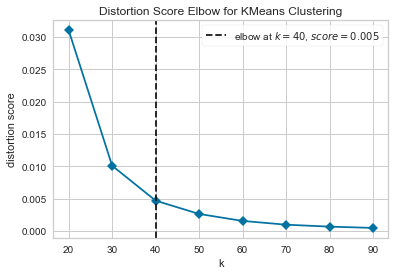

In [115]:
column = 'total_funding_usd'
data = np.array(iv_tf[column].tolist()).reshape((len(iv_tf), 1))
select_k(data)

In [116]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
iv_tf[column] = iv_tf[column].map(mapping)
iv_tf.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
iv_tf

,name_id,relation,total_funding_usd
3,Facebook@04fbb,total_invested_usd,cluster-29-total_funding_usd
20,Twitter@1f709,total_invested_usd,cluster-10-total_funding_usd
37,eBay@2dcb1,total_invested_usd,cluster-0-total_funding_usd
57,Cisco@0065a,total_invested_usd,cluster-0-total_funding_usd
89,Prosper_Marketplace@7bbb6,total_invested_usd,cluster-8-total_funding_usd
...,...,...,...
199912,Blackshiip_VC@f957d,total_invested_usd,cluster-0-total_funding_usd
199924,Entomos@1f470,total_invested_usd,cluster-0-total_funding_usd
200009,Meta4_Capital@a0ed4,total_invested_usd,cluster-0-total_funding_usd
200156,Balt_Financial_Holdings@841f9,total_invested_usd,cluster-15-total_funding_usd


In [117]:
iv_ic = pd.DataFrame(iv[["name_id", "investment_count"]])
iv_ic = iv_ic.dropna()
iv_ic.insert(1, "relation", "investment_count")
iv_ic['investment_count'] = min_max_scaler.fit_transform(iv_ic['investment_count'].values.reshape(-1, 1))
iv_ic

,name_id,relation,investment_count
0,Ben_Elowitz@37a71,investment_count,0.000245
1,Zoho@7efc7,investment_count,0.001471
2,Omidyar_Network@a8eec,investment_count,0.080186
3,Facebook@04fbb,investment_count,0.009318
4,Mark_Zuckerberg@03f22,investment_count,0.001962
...,...,...,...
200448,Kaushal_Vora@48adb,investment_count,0.000245
200457,Basil_Iwanyk@76e11,investment_count,0.000245
200464,Mike_Paulus@6ac1e,investment_count,0.000245
200468,Taavet+Sten@4bbfd,investment_count,0.000245


In [118]:
iv_ic.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

[20, 30, 40, 50, 60, 70, 80, 90]


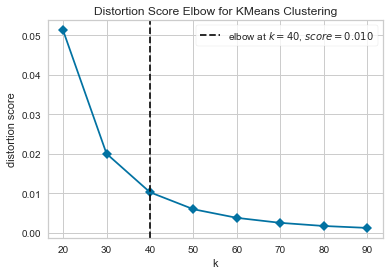

In [119]:
column = 'investment_count'
data = np.array(iv_ic[column].tolist()).reshape((len(iv_ic), 1))
select_k(data)

In [120]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
iv_ic[column] = iv_ic[column].map(mapping)
iv_ic.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
iv_ic

,name_id,relation,investment_count
0,Ben_Elowitz@37a71,investment_count,cluster-0-investment_count
1,Zoho@7efc7,investment_count,cluster-17-investment_count
2,Omidyar_Network@a8eec,investment_count,cluster-24-investment_count
3,Facebook@04fbb,investment_count,cluster-20-investment_count
4,Mark_Zuckerberg@03f22,investment_count,cluster-17-investment_count
...,...,...,...
200448,Kaushal_Vora@48adb,investment_count,cluster-0-investment_count
200457,Basil_Iwanyk@76e11,investment_count,cluster-0-investment_count
200464,Mike_Paulus@6ac1e,investment_count,cluster-0-investment_count
200468,Taavet+Sten@4bbfd,investment_count,cluster-0-investment_count


#### Funds

In [121]:
funds = pd.read_csv("data/funds.csv")
funds.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,entity_uuid,entity_name,entity_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code
0,8190b28a-3c78-0ac4-1e7c-f0b5edce4b2e,DFJ Dragon Second Fund,fund,dfj-dragonfund-raised-dfj-dragon-second-fund--...,https://www.crunchbase.com/fund/dfj-dragonfund...,NaN,2008-12-17 03:07:16,2018-02-12 23:51:25,fe743289-a4aa-a470-00d8-bbe937e0955b,DFJ DragonFund,organization,2008-12-16,300000000.0,300000000.0,USD
1,cbb6644a-eafb-4686-5505-61f32e1c3638,Sequoia Israel Fund IV,fund,sequoia-capital-raised-sequoia-israel-fund-iv-...,https://www.crunchbase.com/fund/sequoia-capita...,NaN,2008-12-18 22:04:42,2018-02-13 00:38:07,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,2008-12-17,200750000.0,200750000.0,USD
2,19fa5c4f-23c3-8c03-2b37-bcd0334505c9,InterWest Tenth Fund,fund,interwest-partners-raised-interwest-tenth-fund...,https://www.crunchbase.com/fund/interwest-part...,NaN,2008-12-31 09:47:51,2018-02-12 23:51:04,3eb9d040-1487-8d0e-4db8-72ec93ce32a5,InterWest Partners,organization,2008-08-11,650000000.0,650000000.0,USD
3,e803081d-0974-eda7-ab5f-c0f1a0a432fe,U.S. Venture Partners X,fund,us-venture-partners-raised-u-s--venture-partne...,https://www.crunchbase.com/fund/us-venture-par...,NaN,2009-01-01 18:13:44,2018-02-12 23:46:44,a2b35e8b-e3e9-883b-8a07-38e6ef57d726,U.S. Venture Partners,organization,2008-07-07,625000000.0,625000000.0,USD
4,49a5722a-084c-3466-fd90-37e885c800b1,Inventus Capital Partners Fund I LP,fund,inventus-capital-partners-raised-inventus-capi...,https://www.crunchbase.com/fund/inventus-capit...,NaN,2009-01-06 18:58:58,2018-02-12 23:35:11,c00d6191-2fbe-f796-54b3-fab074445635,Inventus Capital Partners,organization,2007-12-04,51750000.0,51750000.0,USD


In [122]:
funds["id_slice"] = funds["uuid"].apply(lambda x: x[-5:])
funds["name_id"] =   funds["name"]+ "@" + funds["id_slice"]
funds["name_id"] = funds["name_id"].apply(lambda x: "_".join(x.split()))
funds["eid_slice"] = funds["entity_uuid"].apply(lambda x: x[-5:])
funds["ename_id"] = funds["entity_name"]+ "@" +funds["eid_slice"]
funds["ename_id"] = funds["ename_id"].apply(lambda x: "_".join(x.split()))
funds

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,entity_uuid,entity_name,entity_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,id_slice,name_id,eid_slice,ename_id
0,8190b28a-3c78-0ac4-1e7c-f0b5edce4b2e,DFJ Dragon Second Fund,fund,dfj-dragonfund-raised-dfj-dragon-second-fund--...,https://www.crunchbase.com/fund/dfj-dragonfund...,NaN,2008-12-17 03:07:16,2018-02-12 23:51:25,fe743289-a4aa-a470-00d8-bbe937e0955b,DFJ DragonFund,organization,2008-12-16,3.000000e+08,3.000000e+08,USD,e4b2e,DFJ_Dragon_Second_Fund@e4b2e,0955b,DFJ_DragonFund@0955b
1,cbb6644a-eafb-4686-5505-61f32e1c3638,Sequoia Israel Fund IV,fund,sequoia-capital-raised-sequoia-israel-fund-iv-...,https://www.crunchbase.com/fund/sequoia-capita...,NaN,2008-12-18 22:04:42,2018-02-13 00:38:07,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,2008-12-17,2.007500e+08,2.007500e+08,USD,c3638,Sequoia_Israel_Fund_IV@c3638,55f91,Sequoia_Capital@55f91
2,19fa5c4f-23c3-8c03-2b37-bcd0334505c9,InterWest Tenth Fund,fund,interwest-partners-raised-interwest-tenth-fund...,https://www.crunchbase.com/fund/interwest-part...,NaN,2008-12-31 09:47:51,2018-02-12 23:51:04,3eb9d040-1487-8d0e-4db8-72ec93ce32a5,InterWest Partners,organization,2008-08-11,6.500000e+08,6.500000e+08,USD,505c9,InterWest_Tenth_Fund@505c9,e32a5,InterWest_Partners@e32a5
3,e803081d-0974-eda7-ab5f-c0f1a0a432fe,U.S. Venture Partners X,fund,us-venture-partners-raised-u-s--venture-partne...,https://www.crunchbase.com/fund/us-venture-par...,NaN,2009-01-01 18:13:44,2018-02-12 23:46:44,a2b35e8b-e3e9-883b-8a07-38e6ef57d726,U.S. Venture Partners,organization,2008-07-07,6.250000e+08,6.250000e+08,USD,432fe,U.S._Venture_Partners_X@432fe,7d726,U.S._Venture_Partners@7d726
4,49a5722a-084c-3466-fd90-37e885c800b1,Inventus Capital Partners Fund I LP,fund,inventus-capital-partners-raised-inventus-capi...,https://www.crunchbase.com/fund/inventus-capit...,NaN,2009-01-06 18:58:58,2018-02-12 23:35:11,c00d6191-2fbe-f796-54b3-fab074445635,Inventus Capital Partners,organization,2007-12-04,5.175000e+07,5.175000e+07,USD,800b1,Inventus_Capital_Partners_Fund_I_LP@800b1,45635,Inventus_Capital_Partners@45635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18891,5335a0fb-ff86-494c-a736-2417a2cf5ddb,Piton Capital Fund IV,fund,piton-capital-raised-piton-capital-fund-iv--53...,https://www.crunchbase.com/fund/piton-capital-...,NaN,2021-10-27 10:02:51,2021-10-27 10:05:11,04047899-172d-f103-e748-feea2d823eab,Piton Capital,organization,2020-01-01,NaN,NaN,NaN,f5ddb,Piton_Capital_Fund_IV@f5ddb,23eab,Piton_Capital@23eab
18892,6d422289-1111-4bc3-9ede-3c6e7bb8c0d1,Local Enterprise Fund,fund,65-equity-partners-raised-local-enterprise-fun...,https://www.crunchbase.com/fund/65-equity-part...,NaN,2021-10-27 12:22:49,2021-10-27 12:22:49,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,2021-10-27,1.000000e+09,1.000000e+09,USD,8c0d1,Local_Enterprise_Fund@8c0d1,931d6,65_Equity_Partners@931d6
18893,16c215a9-e424-4468-870a-980b7265d648,Anchor Fund,fund,65-equity-partners-raised-anchor-fund--16c215a9,https://www.crunchbase.com/fund/65-equity-part...,NaN,2021-10-27 12:22:49,2021-10-27 12:22:49,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,2021-10-27,1.500000e+09,1.500000e+09,USD,5d648,Anchor_Fund@5d648,931d6,65_Equity_Partners@931d6
18894,6b432e12-6dc1-46cd-9066-65156edec082,S2S Ventures Fund I,fund,s2s-ventures-raised-s2s-ventures-fund-i--6b432e12,https://www.crunchbase.com/fund/s2s-ventures-r...,NaN,2021-10-27 14:09:55,2021-10-27 14:09:55,34fa3e8c-f104-4f35-85e7-75bc7ce61b20,S2S Ventures,organization,2021-10-21,1.089111e+07,1.000000e+07,CHF,ec082,S2S_Ventures_Fund_I@ec082,61b20,S2S_Ventures@61b20


In [123]:
funds = funds.dropna(subset=['raised_amount_usd'], how='all')
funds = funds[funds['ename_id'].isin(orgs)]
funds

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,entity_uuid,entity_name,entity_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,id_slice,name_id,eid_slice,ename_id
0,8190b28a-3c78-0ac4-1e7c-f0b5edce4b2e,DFJ Dragon Second Fund,fund,dfj-dragonfund-raised-dfj-dragon-second-fund--...,https://www.crunchbase.com/fund/dfj-dragonfund...,NaN,2008-12-17 03:07:16,2018-02-12 23:51:25,fe743289-a4aa-a470-00d8-bbe937e0955b,DFJ DragonFund,organization,2008-12-16,3.000000e+08,3.000000e+08,USD,e4b2e,DFJ_Dragon_Second_Fund@e4b2e,0955b,DFJ_DragonFund@0955b
1,cbb6644a-eafb-4686-5505-61f32e1c3638,Sequoia Israel Fund IV,fund,sequoia-capital-raised-sequoia-israel-fund-iv-...,https://www.crunchbase.com/fund/sequoia-capita...,NaN,2008-12-18 22:04:42,2018-02-13 00:38:07,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,2008-12-17,2.007500e+08,2.007500e+08,USD,c3638,Sequoia_Israel_Fund_IV@c3638,55f91,Sequoia_Capital@55f91
2,19fa5c4f-23c3-8c03-2b37-bcd0334505c9,InterWest Tenth Fund,fund,interwest-partners-raised-interwest-tenth-fund...,https://www.crunchbase.com/fund/interwest-part...,NaN,2008-12-31 09:47:51,2018-02-12 23:51:04,3eb9d040-1487-8d0e-4db8-72ec93ce32a5,InterWest Partners,organization,2008-08-11,6.500000e+08,6.500000e+08,USD,505c9,InterWest_Tenth_Fund@505c9,e32a5,InterWest_Partners@e32a5
3,e803081d-0974-eda7-ab5f-c0f1a0a432fe,U.S. Venture Partners X,fund,us-venture-partners-raised-u-s--venture-partne...,https://www.crunchbase.com/fund/us-venture-par...,NaN,2009-01-01 18:13:44,2018-02-12 23:46:44,a2b35e8b-e3e9-883b-8a07-38e6ef57d726,U.S. Venture Partners,organization,2008-07-07,6.250000e+08,6.250000e+08,USD,432fe,U.S._Venture_Partners_X@432fe,7d726,U.S._Venture_Partners@7d726
4,49a5722a-084c-3466-fd90-37e885c800b1,Inventus Capital Partners Fund I LP,fund,inventus-capital-partners-raised-inventus-capi...,https://www.crunchbase.com/fund/inventus-capit...,NaN,2009-01-06 18:58:58,2018-02-12 23:35:11,c00d6191-2fbe-f796-54b3-fab074445635,Inventus Capital Partners,organization,2007-12-04,5.175000e+07,5.175000e+07,USD,800b1,Inventus_Capital_Partners_Fund_I_LP@800b1,45635,Inventus_Capital_Partners@45635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18889,fa10f646-a035-4805-bded-5276f8516899,Promus Ventures Space Fund,fund,promus-ventures-raised-promus-ventures-space-f...,https://www.crunchbase.com/fund/promus-venture...,NaN,2021-10-27 04:22:37,2021-10-27 04:22:37,754329f1-ee02-70c3-a2a8-2a1b050b4a83,Promus Ventures,organization,2021-10-25,1.393081e+08,1.200000e+08,EUR,16899,Promus_Ventures_Space_Fund@16899,b4a83,Promus_Ventures@b4a83
18892,6d422289-1111-4bc3-9ede-3c6e7bb8c0d1,Local Enterprise Fund,fund,65-equity-partners-raised-local-enterprise-fun...,https://www.crunchbase.com/fund/65-equity-part...,NaN,2021-10-27 12:22:49,2021-10-27 12:22:49,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,2021-10-27,1.000000e+09,1.000000e+09,USD,8c0d1,Local_Enterprise_Fund@8c0d1,931d6,65_Equity_Partners@931d6
18893,16c215a9-e424-4468-870a-980b7265d648,Anchor Fund,fund,65-equity-partners-raised-anchor-fund--16c215a9,https://www.crunchbase.com/fund/65-equity-part...,NaN,2021-10-27 12:22:49,2021-10-27 12:22:49,162b3f08-09ed-4d34-8b64-6934705931d6,65 Equity Partners,organization,2021-10-27,1.500000e+09,1.500000e+09,USD,5d648,Anchor_Fund@5d648,931d6,65_Equity_Partners@931d6
18894,6b432e12-6dc1-46cd-9066-65156edec082,S2S Ventures Fund I,fund,s2s-ventures-raised-s2s-ventures-fund-i--6b432e12,https://www.crunchbase.com/fund/s2s-ventures-r...,NaN,2021-10-27 14:09:55,2021-10-27 14:09:55,34fa3e8c-f104-4f35-85e7-75bc7ce61b20,S2S Ventures,organization,2021-10-21,1.089111e+07,1.000000e+07,CHF,ec082,S2S_Ventures_Fund_I@ec082,61b20,S2S_Ventures@61b20


In [124]:
f_type = pd.DataFrame(funds[["name_id"]])
f_type.insert(1, "relation", "type_of")
f_type.insert(2, "type", "fund")
f_type

,name_id,relation,type
0,DFJ_Dragon_Second_Fund@e4b2e,type_of,fund
1,Sequoia_Israel_Fund_IV@c3638,type_of,fund
2,InterWest_Tenth_Fund@505c9,type_of,fund
3,U.S._Venture_Partners_X@432fe,type_of,fund
4,Inventus_Capital_Partners_Fund_I_LP@800b1,type_of,fund
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,type_of,fund
18892,Local_Enterprise_Fund@8c0d1,type_of,fund
18893,Anchor_Fund@5d648,type_of,fund
18894,S2S_Ventures_Fund_I@ec082,type_of,fund


In [125]:
for f in folders:
    f_type.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [126]:
if take_sample:
    funds = funds.loc[:int(sample_size*len(funds))]

In [127]:
f_a = pd.DataFrame(funds[["name_id", "announced_on"]])
f_a = f_a.dropna()
f_am = f_a.copy()
f_a["announced_on"] = f_a["announced_on"].apply(lambda x: x[:4])
f_a.insert(1, "relation", "announced_on_year")
f_a

,name_id,relation,announced_on
0,DFJ_Dragon_Second_Fund@e4b2e,announced_on_year,2008
1,Sequoia_Israel_Fund_IV@c3638,announced_on_year,2008
2,InterWest_Tenth_Fund@505c9,announced_on_year,2008
3,U.S._Venture_Partners_X@432fe,announced_on_year,2008
4,Inventus_Capital_Partners_Fund_I_LP@800b1,announced_on_year,2007
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,announced_on_year,2021
18892,Local_Enterprise_Fund@8c0d1,announced_on_year,2021
18893,Anchor_Fund@5d648,announced_on_year,2021
18894,S2S_Ventures_Fund_I@ec082,announced_on_year,2021


In [128]:
f_a.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
f_a.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [129]:
f_a['announced_on'] = min_max_scaler.fit_transform(f_a['announced_on'].values.reshape(-1, 1))
f_a.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [130]:
f_a

,name_id,relation,announced_on
0,DFJ_Dragon_Second_Fund@e4b2e,announced_on_year,0.885246
1,Sequoia_Israel_Fund_IV@c3638,announced_on_year,0.885246
2,InterWest_Tenth_Fund@505c9,announced_on_year,0.885246
3,U.S._Venture_Partners_X@432fe,announced_on_year,0.885246
4,Inventus_Capital_Partners_Fund_I_LP@800b1,announced_on_year,0.877049
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,announced_on_year,0.991803
18892,Local_Enterprise_Fund@8c0d1,announced_on_year,0.991803
18893,Anchor_Fund@5d648,announced_on_year,0.991803
18894,S2S_Ventures_Fund_I@ec082,announced_on_year,0.991803


In [131]:
f_am["announced_on"] = f_am["announced_on"].apply(lambda x: int(x[5:7]))
f_am.insert(1, "relation", "announced_on_month")
f_am

,name_id,relation,announced_on
0,DFJ_Dragon_Second_Fund@e4b2e,announced_on_month,12
1,Sequoia_Israel_Fund_IV@c3638,announced_on_month,12
2,InterWest_Tenth_Fund@505c9,announced_on_month,8
3,U.S._Venture_Partners_X@432fe,announced_on_month,7
4,Inventus_Capital_Partners_Fund_I_LP@800b1,announced_on_month,12
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,announced_on_month,10
18892,Local_Enterprise_Fund@8c0d1,announced_on_month,10
18893,Anchor_Fund@5d648,announced_on_month,10
18894,S2S_Ventures_Fund_I@ec082,announced_on_month,10


In [132]:
f_am.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
f_am.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [133]:
f_am['announced_on'] = min_max_scaler.fit_transform(f_am['announced_on'].values.reshape(-1, 1))
f_am.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [134]:
f_am

,name_id,relation,announced_on
0,DFJ_Dragon_Second_Fund@e4b2e,announced_on_month,1.000000
1,Sequoia_Israel_Fund_IV@c3638,announced_on_month,1.000000
2,InterWest_Tenth_Fund@505c9,announced_on_month,0.636364
3,U.S._Venture_Partners_X@432fe,announced_on_month,0.545455
4,Inventus_Capital_Partners_Fund_I_LP@800b1,announced_on_month,1.000000
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,announced_on_month,0.818182
18892,Local_Enterprise_Fund@8c0d1,announced_on_month,0.818182
18893,Anchor_Fund@5d648,announced_on_month,0.818182
18894,S2S_Ventures_Fund_I@ec082,announced_on_month,0.818182


In [135]:
f_e = funds[[ "ename_id", "name_id"]]
f_e = f_e.dropna()
f_e.insert(1, "relation", "has_fund")
f_e

,ename_id,relation,name_id
0,DFJ_DragonFund@0955b,has_fund,DFJ_Dragon_Second_Fund@e4b2e
1,Sequoia_Capital@55f91,has_fund,Sequoia_Israel_Fund_IV@c3638
2,InterWest_Partners@e32a5,has_fund,InterWest_Tenth_Fund@505c9
3,U.S._Venture_Partners@7d726,has_fund,U.S._Venture_Partners_X@432fe
4,Inventus_Capital_Partners@45635,has_fund,Inventus_Capital_Partners_Fund_I_LP@800b1
...,...,...,...
18889,Promus_Ventures@b4a83,has_fund,Promus_Ventures_Space_Fund@16899
18892,65_Equity_Partners@931d6,has_fund,Local_Enterprise_Fund@8c0d1
18893,65_Equity_Partners@931d6,has_fund,Anchor_Fund@5d648
18894,S2S_Ventures@61b20,has_fund,S2S_Ventures_Fund_I@ec082


In [136]:
for fo in folders:
    f_e.to_csv("{}/triplets.txt".format(fo), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [137]:
organizations_list.extend(list(set(f_e['name_id']) & orgs))

In [138]:
f_ra = funds[["name_id", "raised_amount_usd"]]
f_ra = f_ra.dropna()
f_ra.insert(1, "relation", "raised_amount_usd")
f_ra['raised_amount_usd'] = min_max_scaler.fit_transform(f_ra['raised_amount_usd'].values.reshape(-1, 1))
f_ra

,name_id,relation,raised_amount_usd
0,DFJ_Dragon_Second_Fund@e4b2e,raised_amount_usd,0.000400
1,Sequoia_Israel_Fund_IV@c3638,raised_amount_usd,0.000268
2,InterWest_Tenth_Fund@505c9,raised_amount_usd,0.000867
3,U.S._Venture_Partners_X@432fe,raised_amount_usd,0.000833
4,Inventus_Capital_Partners_Fund_I_LP@800b1,raised_amount_usd,0.000069
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,raised_amount_usd,0.000186
18892,Local_Enterprise_Fund@8c0d1,raised_amount_usd,0.001333
18893,Anchor_Fund@5d648,raised_amount_usd,0.002000
18894,S2S_Ventures_Fund_I@ec082,raised_amount_usd,0.000015


In [139]:
f_ra.to_csv("literals.txt", sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [140]:
column = 'raised_amount_usd'
data = np.array(f_ra[column].tolist()).reshape((len(f_ra), 1))
#select_k(data)

In [141]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
f_ra[column] = f_ra[column].map(mapping)
f_ra.to_csv("triplets.txt", sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
f_ra

,name_id,relation,raised_amount_usd
0,DFJ_Dragon_Second_Fund@e4b2e,raised_amount_usd,cluster-12-raised_amount_usd
1,Sequoia_Israel_Fund_IV@c3638,raised_amount_usd,cluster-34-raised_amount_usd
2,InterWest_Tenth_Fund@505c9,raised_amount_usd,cluster-26-raised_amount_usd
3,U.S._Venture_Partners_X@432fe,raised_amount_usd,cluster-26-raised_amount_usd
4,Inventus_Capital_Partners_Fund_I_LP@800b1,raised_amount_usd,cluster-0-raised_amount_usd
...,...,...,...
18889,Promus_Ventures_Space_Fund@16899,raised_amount_usd,cluster-17-raised_amount_usd
18892,Local_Enterprise_Fund@8c0d1,raised_amount_usd,cluster-33-raised_amount_usd
18893,Anchor_Fund@5d648,raised_amount_usd,cluster-21-raised_amount_usd
18894,S2S_Ventures_Fund_I@ec082,raised_amount_usd,cluster-0-raised_amount_usd


#### Acquisitions

In [142]:
a = pd.read_csv("data/acquisitions.csv")
a.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,120313.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,https://www.crunchbase.com/organization/fox-in...,USA,CA,California,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,30052.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD
2,01bd2058-ccf8-6102-f253-9224a67a592b,Last.fm acquired by CBS Entertainment,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,96102.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,https://www.crunchbase.com/organization/cbs,USA,NY,New York,New York,NaN,2007-05-01,280000000.0,280000000.0,USD
3,831becd6-e913-b9f5-ac09-2bff915f9453,Kosiso - store acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,75010.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,Kosiso - store,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,acquisition,2007-05-23,100000000.0,100000000.0,USD
4,9da90ee7-aad7-e0b4-8456-839363032e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,80392.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,https://www.crunchbase.com/organization/scripp...,USA,TN,Tennessee,Knoxville,NaN,2007-07-01,NaN,NaN,NaN


In [143]:
a["uuid"] = a["uuid"].apply(lambda x: "ac@" + x[-5:])
a["ridslice"] = a["acquirer_uuid"].apply(lambda x: x[-5:])
a["rname_id"] = a["acquirer_name"] + "@" + a["ridslice"]
a["rname_id"]  = a["rname_id"] .apply(lambda x: "_".join(x.split()))
a["eidslice"] = a["acquiree_uuid"].apply(lambda x: x[-5:])
a["ename_id"] = a["acquiree_name"] + "@" + a["eidslice"]
a["ename_id"] = a["ename_id"].apply(lambda x: "_".join(x.split()))
a

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code,ridslice,rname_id,eidslice,ename_id
0,ac@ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,120313.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN,1b78b,Fox_Interactive_Media@1b78b,330ba,Flektor@330ba
1,ac@45cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,30052.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD,27711,Google@27711,e1192,GrandCentral@e1192
2,ac@a592b,Last.fm acquired by CBS Entertainment,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,96102.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,New York,NaN,2007-05-01,280000000.0,280000000.0,USD,2e4ea,CBS_Entertainment@2e4ea,85f2d,Last.fm@85f2d
3,ac@f9453,Kosiso - store acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,75010.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,Kosiso - store,...,Mountain View,acquisition,2007-05-23,100000000.0,100000000.0,USD,27711,Google@27711,a9f41,Kosiso_-_store@a9f41
4,ac@32e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,80392.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,Knoxville,NaN,2007-07-01,NaN,NaN,NaN,a4b35,Scripps_Networks@a4b35,985a0,Recipezaar@985a0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127181,ac@38367,Ultimedia acquired by Remarkable Group Interna...,acquisition,remarkable-group-international-acquires-ultime...,https://www.crunchbase.com/acquisition/remarka...,NaN,2021-10-27 13:56:17,2021-10-27 13:56:17,537e3b08-25e7-47ec-82b8-0174675cdb8f,Ultimedia,...,Ashford,acquisition,2021-10-27,NaN,NaN,NaN,a9b35,Remarkable_Group_International@a9b35,cdb8f,Ultimedia@cdb8f
127182,ac@627ac,Digital Guardian acquired by HelpSystems,acquisition,help-systems-acquires-digitalguardian--c6e14357,https://www.crunchbase.com/acquisition/help-sy...,NaN,2021-10-27 14:00:29,2021-10-27 14:00:29,79395731-a1c9-05ed-59e8-8c720687d676,Digital Guardian,...,Eden Prairie,acquisition,2021-10-27,NaN,NaN,NaN,356cd,HelpSystems@356cd,7d676,Digital_Guardian@7d676
127183,ac@02569,Brandwise acquired by MarketTime,acquisition,markettime-acquires-brandwise--f477824b,https://www.crunchbase.com/acquisition/markett...,NaN,2021-10-27 14:03:48,2021-10-27 14:03:48,5909a7f2-32c4-ab9c-5c49-be5dc93cf576,Brandwise,...,Dallas,acquisition,2021-10-21,NaN,NaN,NaN,98bf3,MarketTime@98bf3,cf576,Brandwise@cf576
127184,ac@1ac70,Midwest Warehouse & Distribution System acquir...,acquisition,ryder-systems-acquires-midwest-warehouse-distr...,https://www.crunchbase.com/acquisition/ryder-s...,NaN,2021-10-27 15:19:07,2021-10-27 15:19:07,70a066c2-12cc-4c0a-8dcc-213247260098,Midwest Warehouse & Distribution System,...,Miami,acquisition,2021-10-27,NaN,NaN,NaN,93d6e,Ryder@93d6e,60098,Midwest_Warehouse_&_Distribution_System@60098


In [144]:
a = a[a['rname_id'].isin(orgs)]
a = a[a['ename_id'].isin(orgs)]
a

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code,ridslice,rname_id,eidslice,ename_id
0,ac@ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,120313.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN,1b78b,Fox_Interactive_Media@1b78b,330ba,Flektor@330ba
1,ac@45cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,30052.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD,27711,Google@27711,e1192,GrandCentral@e1192
2,ac@a592b,Last.fm acquired by CBS Entertainment,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,96102.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,New York,NaN,2007-05-01,280000000.0,280000000.0,USD,2e4ea,CBS_Entertainment@2e4ea,85f2d,Last.fm@85f2d
3,ac@f9453,Kosiso - store acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,75010.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,Kosiso - store,...,Mountain View,acquisition,2007-05-23,100000000.0,100000000.0,USD,27711,Google@27711,a9f41,Kosiso_-_store@a9f41
4,ac@32e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,80392.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,Knoxville,NaN,2007-07-01,NaN,NaN,NaN,a4b35,Scripps_Networks@a4b35,985a0,Recipezaar@985a0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127181,ac@38367,Ultimedia acquired by Remarkable Group Interna...,acquisition,remarkable-group-international-acquires-ultime...,https://www.crunchbase.com/acquisition/remarka...,NaN,2021-10-27 13:56:17,2021-10-27 13:56:17,537e3b08-25e7-47ec-82b8-0174675cdb8f,Ultimedia,...,Ashford,acquisition,2021-10-27,NaN,NaN,NaN,a9b35,Remarkable_Group_International@a9b35,cdb8f,Ultimedia@cdb8f
127182,ac@627ac,Digital Guardian acquired by HelpSystems,acquisition,help-systems-acquires-digitalguardian--c6e14357,https://www.crunchbase.com/acquisition/help-sy...,NaN,2021-10-27 14:00:29,2021-10-27 14:00:29,79395731-a1c9-05ed-59e8-8c720687d676,Digital Guardian,...,Eden Prairie,acquisition,2021-10-27,NaN,NaN,NaN,356cd,HelpSystems@356cd,7d676,Digital_Guardian@7d676
127183,ac@02569,Brandwise acquired by MarketTime,acquisition,markettime-acquires-brandwise--f477824b,https://www.crunchbase.com/acquisition/markett...,NaN,2021-10-27 14:03:48,2021-10-27 14:03:48,5909a7f2-32c4-ab9c-5c49-be5dc93cf576,Brandwise,...,Dallas,acquisition,2021-10-21,NaN,NaN,NaN,98bf3,MarketTime@98bf3,cf576,Brandwise@cf576
127184,ac@1ac70,Midwest Warehouse & Distribution System acquir...,acquisition,ryder-systems-acquires-midwest-warehouse-distr...,https://www.crunchbase.com/acquisition/ryder-s...,NaN,2021-10-27 15:19:07,2021-10-27 15:19:07,70a066c2-12cc-4c0a-8dcc-213247260098,Midwest Warehouse & Distribution System,...,Miami,acquisition,2021-10-27,NaN,NaN,NaN,93d6e,Ryder@93d6e,60098,Midwest_Warehouse_&_Distribution_System@60098


In [145]:
if take_sample:
    a = a.loc[:int(sample_size*len(a))]

In [147]:
ac_on = pd.DataFrame(a[["uuid", "acquired_on"]])
ac_on = ac_on.dropna()
ac_ony = ac_on.copy()
ac_ony["acquired_on"] = ac_ony["acquired_on"].apply(lambda x: x[:4])
ac_ony.insert(1, "relation", "acquired_on_year")
ac_ony

,uuid,relation,acquired_on
0,ac@ed44c,acquired_on_year,2007
1,ac@45cca,acquired_on_year,2007
2,ac@a592b,acquired_on_year,2007
3,ac@f9453,acquired_on_year,2007
4,ac@32e5e,acquired_on_year,2007
...,...,...,...
127181,ac@38367,acquired_on_year,2021
127182,ac@627ac,acquired_on_year,2021
127183,ac@02569,acquired_on_year,2021
127184,ac@1ac70,acquired_on_year,2021


In [148]:
ac_ony.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ac_ony.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [149]:
ac_ony['acquired_on'] = min_max_scaler.fit_transform(ac_ony['acquired_on'].values.reshape(-1, 1))
ac_ony.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ac_ony

,uuid,relation,acquired_on
0,ac@ed44c,acquired_on_year,0.876106
1,ac@45cca,acquired_on_year,0.876106
2,ac@a592b,acquired_on_year,0.876106
3,ac@f9453,acquired_on_year,0.876106
4,ac@32e5e,acquired_on_year,0.876106
...,...,...,...
127181,ac@38367,acquired_on_year,1.000000
127182,ac@627ac,acquired_on_year,1.000000
127183,ac@02569,acquired_on_year,1.000000
127184,ac@1ac70,acquired_on_year,1.000000


In [150]:
ac_onm = ac_on.copy()
ac_onm["acquired_on"] = ac_onm["acquired_on"].apply(lambda x: int(x[5:7]))
ac_onm.insert(1, "relation", "acquired_on_month")
ac_onm

,uuid,relation,acquired_on
0,ac@ed44c,acquired_on_month,5
1,ac@45cca,acquired_on_month,7
2,ac@a592b,acquired_on_month,5
3,ac@f9453,acquired_on_month,5
4,ac@32e5e,acquired_on_month,7
...,...,...,...
127181,ac@38367,acquired_on_month,10
127182,ac@627ac,acquired_on_month,10
127183,ac@02569,acquired_on_month,10
127184,ac@1ac70,acquired_on_month,10


In [151]:
ac_onm.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ac_onm.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [152]:
ac_onm['acquired_on'] = min_max_scaler.fit_transform(ac_onm['acquired_on'].values.reshape(-1, 1))
ac_onm.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
ac_onm

,uuid,relation,acquired_on
0,ac@ed44c,acquired_on_month,0.363636
1,ac@45cca,acquired_on_month,0.545455
2,ac@a592b,acquired_on_month,0.363636
3,ac@f9453,acquired_on_month,0.363636
4,ac@32e5e,acquired_on_month,0.545455
...,...,...,...
127181,ac@38367,acquired_on_month,0.818182
127182,ac@627ac,acquired_on_month,0.818182
127183,ac@02569,acquired_on_month,0.818182
127184,ac@1ac70,acquired_on_month,0.818182


In [153]:
acquirer = pd.DataFrame(a[["rname_id", "uuid"]])
acquiree = pd.DataFrame(a[["ename_id", "uuid"]])
acquirer.insert(1, "relation", "is_acquirer")
acquiree.insert(1, "relation", "is_acquiree")
print(acquirer)
print(acquiree)

                                    rname_id     relation      uuid
0                Fox_Interactive_Media@1b78b  is_acquirer  ac@ed44c
1                               Google@27711  is_acquirer  ac@45cca
2                    CBS_Entertainment@2e4ea  is_acquirer  ac@a592b
3                               Google@27711  is_acquirer  ac@f9453
4                     Scripps_Networks@a4b35  is_acquirer  ac@32e5e
...                                      ...          ...       ...
127181  Remarkable_Group_International@a9b35  is_acquirer  ac@38367
127182                     HelpSystems@356cd  is_acquirer  ac@627ac
127183                      MarketTime@98bf3  is_acquirer  ac@02569
127184                           Ryder@93d6e  is_acquirer  ac@1ac70
127185                 Walker_&_Dunlop@f6574  is_acquirer  ac@3348a

[127186 rows x 3 columns]
                                             ename_id     relation      uuid
0                                       Flektor@330ba  is_acquiree  ac@ed44c
1  

In [154]:
for f in folders:
    acquiree.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
    acquirer.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [155]:
organizations_list.extend(list(set(acquiree['ename_id'])))
organizations_list.extend(list(set(acquirer['rname_id'])))

In [156]:
a_type = pd.DataFrame(a[["uuid", "acquisition_type"]])
a_type = a_type.dropna()
a_type.insert(1 ,"relation", "type_of")
a_type

,uuid,relation,acquisition_type
3,ac@f9453,type_of,acquisition
7,ac@06c9d,type_of,acquisition
8,ac@c02cf,type_of,acquisition
10,ac@b346c,type_of,acquisition
12,ac@ecc7b,type_of,acquisition
...,...,...,...
127181,ac@38367,type_of,acquisition
127182,ac@627ac,type_of,acquisition
127183,ac@02569,type_of,acquisition
127184,ac@1ac70,type_of,acquisition


In [157]:
for f in folders:
    a_type.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [158]:
a_subtype = list(a_type.acquisition_type.unique())
a_subtype.remove("acquisition")
a_subtype = pd.DataFrame(a_subtype)
a_subtype.insert(1, "relation", "subtype_of")
a_subtype.insert(2, "type","acquisition")
a_subtype

,0,relation,type
0,merge,subtype_of,acquisition
1,lbo,subtype_of,acquisition
2,acquihire,subtype_of,acquisition
3,management_buyout,subtype_of,acquisition


In [159]:
for f in folders:
    a_subtype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [160]:
a_pu = pd.DataFrame(a[["uuid", "price_usd"]])
a_pu = a_pu.dropna()
a_pu.insert(1 ,"relation", "price_usd")
a_pu['price_usd'] = min_max_scaler.fit_transform(a_pu['price_usd'].values.reshape(-1, 1))
a_pu

,uuid,relation,price_usd
1,ac@45cca,price_usd,0.000370
2,ac@a592b,price_usd,0.001728
3,ac@f9453,price_usd,0.000617
8,ac@c02cf,price_usd,0.009259
10,ac@b346c,price_usd,0.000031
...,...,...,...
127150,ac@2ee89,price_usd,0.003938
127166,ac@45196,price_usd,0.002160
127170,ac@54ebe,price_usd,0.003858
127171,ac@b8b32,price_usd,0.000054


In [161]:
a_pu.to_csv("literals.txt", sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [162]:
column = 'price_usd'
data = np.array(a_pu[column].tolist()).reshape((len(a_pu), 1))
#select_k(data)

In [163]:
final_kmeans = KMeans(n_clusters=40).fit(data)
labels = ['cluster-{}-{}'.format(l, column) for l in final_kmeans.labels_]
mapping = dict(zip(data.squeeze().tolist(), labels))
a_pu[column] = a_pu[column].map(mapping)
a_pu.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
dump_clusters(final_kmeans, data, column)
a_pu

,uuid,relation,price_usd
1,ac@45cca,price_usd,cluster-39-price_usd
2,ac@a592b,price_usd,cluster-24-price_usd
3,ac@f9453,price_usd,cluster-39-price_usd
8,ac@c02cf,price_usd,cluster-35-price_usd
10,ac@b346c,price_usd,cluster-0-price_usd
...,...,...,...
127150,ac@2ee89,price_usd,cluster-12-price_usd
127166,ac@45196,price_usd,cluster-24-price_usd
127170,ac@54ebe,price_usd,cluster-12-price_usd
127171,ac@b8b32,price_usd,cluster-0-price_usd


### Events

In [164]:
e = pd.read_csv("data/events.csv")
e.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,short_description,started_on,...,event_url,registration_url,venue_name,description,country_code,state_code,region,city,logo_url,event_roles
0,6a21f93a-3cae-02ac-44c7-c166c0ed50fa,SF New Tech,event,sfnt-201272-san-francisco,https://www.crunchbase.com/event/sfnt-201272-s...,17183.0,2014-10-03 18:12:25,2018-02-13 01:14:28,"Join us on Wed, Oct 15th for another edition o...",2014-10-14,...,NaN,http://1015sfnt-meetup.eventbrite.com,RocketStudios,NaN,USA,CA,California,San Francisco,NaN,conference
1,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,event,adobe-max-2014104-los-angeles,https://www.crunchbase.com/event/adobe-max-201...,14386.0,2014-10-03 18:14:15,2018-02-13 01:14:24,"Sessions, labs, and creativity workshops where...",2014-10-04,...,NaN,http://max.adobe.com/registration/,Los Angeles Convention Center,NaN,USA,CA,California,Los Angeles,https://res.cloudinary.com/crunchbase-producti...,conference
2,c6006d9f-e796-2a2a-2efc-c4e55caa98f8,ad:tech New York,event,ad-tech-new-york-2014105-new-york,https://www.crunchbase.com/event/ad-tech-new-y...,3398.0,2014-10-03 18:40:03,2018-02-13 01:14:23,ad:tech New York will showcase keynote speaker...,2014-10-05,...,NaN,http://ad-tech.com/ny/registration,Javits Center,NaN,USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,conference
3,2710319a-f022-5cd3-f855-6594fd0d6db3,Engadget Expand,event,engadget-expand-2014107-new-york,https://www.crunchbase.com/event/engadget-expa...,15995.0,2014-10-03 18:51:28,2018-02-13 01:14:21,Engadget Expand is designed from the ground up...,2014-11-07,...,NaN,http://www.eventbrite.com/e/engadget-expand-ny...,Javits Center,"It’s a free, 10,000+ attendee event that give...",USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,"conference,expo"
4,35e61ac8-58bf-0492-8285-39dc9c2b236d,Dreamforce 2014,event,dreamforce-20141013-san-francisco,https://www.crunchbase.com/event/dreamforce-20...,2350.0,2014-10-03 19:05:07,2018-06-22 04:56:39,Dreamforce is your chance to learn from indust...,2014-10-13,...,https://www.montypythonlive.com/best-led-grow-...,http://www.salesforce.com/dreamforce/DF14/regi...,Moscone Center,NaN,USA,CA,California,San Francisco,https://res.cloudinary.com/crunchbase-producti...,conference


In [165]:
e = e.drop_duplicates(subset = "name", keep = "last")
e["name"] = e["name"].apply(lambda x: "_".join(x.split()))
e["uuid"] = e["uuid"].apply(lambda x: x[-5:])
e["name"] = e["name"] + "@" + e["uuid"]
e.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,short_description,started_on,...,event_url,registration_url,venue_name,description,country_code,state_code,region,city,logo_url,event_roles
0,d50fa,SF_New_Tech@d50fa,event,sfnt-201272-san-francisco,https://www.crunchbase.com/event/sfnt-201272-s...,17183.0,2014-10-03 18:12:25,2018-02-13 01:14:28,"Join us on Wed, Oct 15th for another edition o...",2014-10-14,...,NaN,http://1015sfnt-meetup.eventbrite.com,RocketStudios,NaN,USA,CA,California,San Francisco,NaN,conference
1,11ed2,Adobe_MAX_2014@11ed2,event,adobe-max-2014104-los-angeles,https://www.crunchbase.com/event/adobe-max-201...,14386.0,2014-10-03 18:14:15,2018-02-13 01:14:24,"Sessions, labs, and creativity workshops where...",2014-10-04,...,NaN,http://max.adobe.com/registration/,Los Angeles Convention Center,NaN,USA,CA,California,Los Angeles,https://res.cloudinary.com/crunchbase-producti...,conference
2,a98f8,ad:tech_New_York@a98f8,event,ad-tech-new-york-2014105-new-york,https://www.crunchbase.com/event/ad-tech-new-y...,3398.0,2014-10-03 18:40:03,2018-02-13 01:14:23,ad:tech New York will showcase keynote speaker...,2014-10-05,...,NaN,http://ad-tech.com/ny/registration,Javits Center,NaN,USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,conference
3,d6db3,Engadget_Expand@d6db3,event,engadget-expand-2014107-new-york,https://www.crunchbase.com/event/engadget-expa...,15995.0,2014-10-03 18:51:28,2018-02-13 01:14:21,Engadget Expand is designed from the ground up...,2014-11-07,...,NaN,http://www.eventbrite.com/e/engadget-expand-ny...,Javits Center,"It’s a free, 10,000+ attendee event that give...",USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,"conference,expo"
5,36c3e,Wired_2014@36c3e,event,wired-2014-20141016-london,https://www.crunchbase.com/event/wired-2014-20...,23215.0,2014-10-03 19:10:15,2018-02-13 01:14:23,WIRED2014 aims to bring the WIRED world to lif...,2014-10-16,...,NaN,https://www.eventbrite.co.uk/e/wired-2014-tick...,Tobacco Dock,NaN,GBR,NaN,England,London,https://res.cloudinary.com/crunchbase-producti...,conference


In [166]:
if take_sample:
    e = e.loc[:int(sample_size*len(e))]

In [167]:
e_start = pd.DataFrame(e[["name", "started_on"]])
e_start = e_start.dropna()
e_start_month = e_start.copy()
e_start["started_on"] = e_start["started_on"].apply(lambda x: x[:4])
e_start.insert(1, "relation", "started_on_year")
e_start

,name,relation,started_on
0,SF_New_Tech@d50fa,started_on_year,2014
1,Adobe_MAX_2014@11ed2,started_on_year,2014
2,ad:tech_New_York@a98f8,started_on_year,2014
3,Engadget_Expand@d6db3,started_on_year,2014
5,Wired_2014@36c3e,started_on_year,2014
...,...,...,...
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,started_on_year,2021
24466,Open-Source_Experience@d1874,started_on_year,2021
24467,Solve_the_Analytics_Last-Mile_Problem_with_a_D...,started_on_year,2021
24468,Harvard_Business_School_New_Venture_Competitio...,started_on_year,2021


In [168]:
e_start.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None)
e_start.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None)

In [169]:
e_start['started_on'] = min_max_scaler.fit_transform(e_start['started_on'].values.reshape(-1, 1))
e_start.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None)

In [170]:
e_start_month["started_on"] = e_start_month["started_on"].apply(lambda x: int(x[5:7]))
e_start_month.insert(1, "relation", "started_on_month")
e_start_month

,name,relation,started_on
0,SF_New_Tech@d50fa,started_on_month,10
1,Adobe_MAX_2014@11ed2,started_on_month,10
2,ad:tech_New_York@a98f8,started_on_month,10
3,Engadget_Expand@d6db3,started_on_month,11
5,Wired_2014@36c3e,started_on_month,10
...,...,...,...
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,started_on_month,11
24466,Open-Source_Experience@d1874,started_on_month,11
24467,Solve_the_Analytics_Last-Mile_Problem_with_a_D...,started_on_month,11
24468,Harvard_Business_School_New_Venture_Competitio...,started_on_month,3


In [171]:
e_start_month.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None)
e_start_month.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None)

In [172]:
e_start_month['started_on'] = min_max_scaler.fit_transform(e_start_month['started_on'].values.reshape(-1, 1))
e_start_month.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None)

In [173]:
e_end = pd.DataFrame(e[["name", "ended_on"]])
e_end = e_end.dropna()
e_end_month = e_end.copy()
e_end["ended_on"] = e_end["ended_on"].apply(lambda x: x[:4])
e_end.insert(1, "relation", "ended_on_year")
e_end

,name,relation,ended_on
0,SF_New_Tech@d50fa,ended_on_year,2014
1,Adobe_MAX_2014@11ed2,ended_on_year,2014
2,ad:tech_New_York@a98f8,ended_on_year,2014
3,Engadget_Expand@d6db3,ended_on_year,2014
5,Wired_2014@36c3e,ended_on_year,2014
...,...,...,...
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,ended_on_year,2021
24466,Open-Source_Experience@d1874,ended_on_year,2021
24467,Solve_the_Analytics_Last-Mile_Problem_with_a_D...,ended_on_year,2021
24468,Harvard_Business_School_New_Venture_Competitio...,ended_on_year,2021


In [174]:
e_end.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None)
e_end.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None)

In [175]:
e_end['ended_on'] = min_max_scaler.fit_transform(e_end['ended_on'].values.reshape(-1, 1))
e_end.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None)

In [176]:
e_end_month["ended_on"] = e_end_month["ended_on"].apply(lambda x: int(x[5:7]))
e_end_month.insert(1, "relation", "ended_on_month")
e_end_month

,name,relation,ended_on
0,SF_New_Tech@d50fa,ended_on_month,10
1,Adobe_MAX_2014@11ed2,ended_on_month,10
2,ad:tech_New_York@a98f8,ended_on_month,10
3,Engadget_Expand@d6db3,ended_on_month,11
5,Wired_2014@36c3e,ended_on_month,10
...,...,...,...
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,ended_on_month,11
24466,Open-Source_Experience@d1874,ended_on_month,11
24467,Solve_the_Analytics_Last-Mile_Problem_with_a_D...,ended_on_month,11
24468,Harvard_Business_School_New_Venture_Competitio...,ended_on_month,3


In [177]:
e_end_month.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None)
e_end_month.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None)

In [178]:
e_end_month['ended_on'] = min_max_scaler.fit_transform(e_end_month['ended_on'].values.reshape(-1, 1))
e_end_month.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None)

In [179]:
e_c = pd.DataFrame(e[["name", "country_code"]])
e_c = e_c.dropna()
e_c.insert(1, "relation", "country_code")
e_c

,name,relation,country_code
0,SF_New_Tech@d50fa,country_code,USA
1,Adobe_MAX_2014@11ed2,country_code,USA
2,ad:tech_New_York@a98f8,country_code,USA
3,Engadget_Expand@d6db3,country_code,USA
5,Wired_2014@36c3e,country_code,GBR
...,...,...,...
24448,Web_Summit_2021_Forbes_Club_Investor_Party@bba8f,country_code,PRT
24453,PAINWeek_2021@67bbe,country_code,USA
24464,TecHome_Builder_Summit_Seattle@edb18,country_code,USA
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,country_code,HKG


In [180]:
for f in folders:
    e_c.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

In [181]:
e_city = pd.DataFrame(e[["name", "city"]])
e_city = e_city.dropna()
e_city["city"] = e_city["city"].apply(lambda x: "_".join(x.split()))
e_city.insert(1, "relation", "city")
e_city

,name,relation,city
0,SF_New_Tech@d50fa,city,San_Francisco
1,Adobe_MAX_2014@11ed2,city,Los_Angeles
2,ad:tech_New_York@a98f8,city,New_York
3,Engadget_Expand@d6db3,city,New_York
5,Wired_2014@36c3e,city,London
...,...,...,...
24448,Web_Summit_2021_Forbes_Club_Investor_Party@bba8f,city,Lisbon
24453,PAINWeek_2021@67bbe,city,Las_Vegas
24464,TecHome_Builder_Summit_Seattle@edb18,city,Seattle
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,city,Hong_Kong


In [182]:
for f in folders:
    e_city.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

In [183]:
e_role = pd.DataFrame(e[["name", "event_roles"]])
e_role["event_roles"] = e_role["event_roles"].replace("other", float('Nan'))
e_role = e_role.dropna()
e_role["event_roles"] = e_role["event_roles"].apply(lambda x: x.split(","))
e_role = e_role.explode("event_roles")
e_role["event_roles"] = e_role["event_roles"].apply(lambda x: x.strip())
e_role.insert(1, "relation", "type_of")
e_role

,name,relation,event_roles
0,SF_New_Tech@d50fa,type_of,conference
1,Adobe_MAX_2014@11ed2,type_of,conference
2,ad:tech_New_York@a98f8,type_of,conference
3,Engadget_Expand@d6db3,type_of,conference
3,Engadget_Expand@d6db3,type_of,expo
...,...,...,...
24465,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...,type_of,networking
24466,Open-Source_Experience@d1874,type_of,conference
24467,Solve_the_Analytics_Last-Mile_Problem_with_a_D...,type_of,webinar
24468,Harvard_Business_School_New_Venture_Competitio...,type_of,competition


In [184]:
for f in folders:
    e_role.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

In [185]:
eroles = list(e_role["event_roles"].unique())
print(eroles)
e_sub = pd.DataFrame(eroles)
e_sub.insert(1, "relation", "subtype_of")
e_sub.insert(2, "type", "event")
e_sub

['conference', 'expo', 'meetup', 'competition', 'hackathon', 'networking', 'other', 'demo_day', 'festival', 'seminar', 'webinar', 'class', 'virtual']


,0,relation,type
0,conference,subtype_of,event
1,expo,subtype_of,event
2,meetup,subtype_of,event
3,competition,subtype_of,event
4,hackathon,subtype_of,event
5,networking,subtype_of,event
6,other,subtype_of,event
7,demo_day,subtype_of,event
8,festival,subtype_of,event
9,seminar,subtype_of,event


In [186]:
for f in folders:
    e_sub.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

#### Event appearance

In [187]:
ea = pd.read_csv("data/event_appearances.csv")
ea.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description
0,30c4023d-b694-4704-97d7-cd99cd06ecce,Adobe MAX 2014's sponsor - CDW Corporation,event_appearance,cdw-corporation-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/cd...,NaN,2014-10-03 18:21:26,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,ae883a31-3739-7eb9-4ce0-463ee070ed79,CDW Corporation,organization,sponsor,NaN
1,dffe0542-3dac-4228-a997-3eed42cbd67e,Adobe MAX 2014's sponsor - Microsoft,event_appearance,microsoft-sponsor-adobe-max-2014104-los-angele...,https://www.crunchbase.com/event_appearance/mi...,NaN,2014-10-03 18:21:42,2018-02-13 01:16:21,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,organization,sponsor,NaN
2,21884e6c-d097-4c54-8513-10536a0ea60d,Adobe MAX 2014's sponsor - Twitter,event_appearance,twitter-sponsor-adobe-max-2014104-los-angeles-...,https://www.crunchbase.com/event_appearance/tw...,NaN,2014-10-03 18:21:55,2018-02-13 01:16:23,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,sponsor,NaN
3,c3782f8f-4684-47d6-8649-d0b3e1825eb5,Adobe MAX 2014's sponsor - HP,event_appearance,hewlett-packard-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/he...,NaN,2014-10-03 18:22:03,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,8adadbfb-be63-6602-8ca0-b037397a7038,HP,organization,sponsor,NaN
4,55e2ee8b-b5b7-49d3-bd21-a63eedf6b7f2,Adobe MAX 2014's sponsor - Intel,event_appearance,intel-sponsor-adobe-max-2014104-los-angeles--5...,https://www.crunchbase.com/event_appearance/in...,NaN,2014-10-03 18:22:11,2018-02-13 01:16:24,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,NaN


In [188]:
ea = ea.drop_duplicates(subset = "name", keep = "last")
ea["idslice"] = ea["participant_uuid"].apply(lambda x: x[-5:])
ea["name_id"] = ea["participant_name"] + "@" + ea["idslice"] 
ea["name_id"] = ea["name_id"].apply(lambda x: "_".join(x.split()))
ea["event_name"] = ea["event_name"].apply(lambda x: "_".join(x.split()))
ea["uuid"] = ea["uuid"].apply(lambda x: x[-5:])
ea["event_name"] = ea["event_name"] + "@" + ea["uuid"]
ea.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description,idslice,name_id
0,6ecce,Adobe MAX 2014's sponsor - CDW Corporation,event_appearance,cdw-corporation-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/cd...,NaN,2014-10-03 18:21:26,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe_MAX_2014@6ecce,ae883a31-3739-7eb9-4ce0-463ee070ed79,CDW Corporation,organization,sponsor,NaN,0ed79,CDW_Corporation@0ed79
1,bd67e,Adobe MAX 2014's sponsor - Microsoft,event_appearance,microsoft-sponsor-adobe-max-2014104-los-angele...,https://www.crunchbase.com/event_appearance/mi...,NaN,2014-10-03 18:21:42,2018-02-13 01:16:21,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe_MAX_2014@bd67e,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,organization,sponsor,NaN,9ffbb,Microsoft@9ffbb
2,ea60d,Adobe MAX 2014's sponsor - Twitter,event_appearance,twitter-sponsor-adobe-max-2014104-los-angeles-...,https://www.crunchbase.com/event_appearance/tw...,NaN,2014-10-03 18:21:55,2018-02-13 01:16:23,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe_MAX_2014@ea60d,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,sponsor,NaN,1f709,Twitter@1f709
3,25eb5,Adobe MAX 2014's sponsor - HP,event_appearance,hewlett-packard-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/he...,NaN,2014-10-03 18:22:03,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe_MAX_2014@25eb5,8adadbfb-be63-6602-8ca0-b037397a7038,HP,organization,sponsor,NaN,a7038,HP@a7038
4,6b7f2,Adobe MAX 2014's sponsor - Intel,event_appearance,intel-sponsor-adobe-max-2014104-los-angeles--5...,https://www.crunchbase.com/event_appearance/in...,NaN,2014-10-03 18:22:11,2018-02-13 01:16:24,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe_MAX_2014@6b7f2,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,NaN,75ee5,Intel@75ee5


In [189]:
if take_sample:
    ea = ea.loc[:int(sample_size*len(ea))]

In [190]:
ea_atype = pd.DataFrame(ea[["name_id", "appearance_type", "event_name"]])
ea_atype = ea_atype.dropna()
ea_atype = ea_atype[ea_atype['name_id'].isin(orgs)]
ea_atype

,name_id,appearance_type,event_name
0,CDW_Corporation@0ed79,sponsor,Adobe_MAX_2014@6ecce
1,Microsoft@9ffbb,sponsor,Adobe_MAX_2014@bd67e
2,Twitter@1f709,sponsor,Adobe_MAX_2014@ea60d
3,HP@a7038,sponsor,Adobe_MAX_2014@25eb5
4,Intel@75ee5,sponsor,Adobe_MAX_2014@6b7f2
...,...,...,...
423784,Thoma_Bravo@3f35a,speaker,AVCJ_PRIVATE_EQUITY_&_VENTURE_FORUM_(34th_ANNU...
423790,DataKitchen@dd881,organizer,Solve_the_Analytics_Last-Mile_Problem_with_a_D...
423794,DataKitchen@dd881,speaker,DevOps_Summit_2021@78c23
423796,Itential@5588a,speaker,Cisco_Live_San_Diego_2019@bc362


In [191]:
for f in folders:
    ea_atype.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

In [192]:
organizations_list.extend(list(set(ea_atype['name_id'])))

## Organizations

In [193]:
organizations_list = set(organizations_list)
org = org[org['name_id'].isin(organizations_list)]
org_em = pd.DataFrame(org[["name_id", "employee_count"]])
org_em["employee_count"] = org_em["employee_count"].replace("unknown", float("NaN"))
org_em = org_em.dropna()
org_em.insert(1, "relation", "employee_count")
org_em

,name_id,relation,employee_count
0,Wetpaint@33abd,employee_count,51-100
1,Zoho@7efc7,employee_count,1001-5000
2,Digg@553d0,employee_count,51-100
3,Omidyar_Network@a8eec,employee_count,101-250
4,Facebook@04fbb,employee_count,10000+
...,...,...,...
1642113,Unsquared@b3c24,employee_count,1-10
1642148,Multicap@88889,employee_count,1-10
1642152,European_Blockchain_Association@5f550,employee_count,11-50
1642157,SoULuvMuziq@a121d,employee_count,1-10


In [194]:
for f in folders:
    org_em.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [195]:
org_type = pd.DataFrame(org[["name_id", "type"]])
org_type.dropna()
org_type.insert(1, "relation", "type_of")
print(org_type)

                                       name_id relation          type
0                               Wetpaint@33abd  type_of  organization
1                                   Zoho@7efc7  type_of  organization
2                                   Digg@553d0  type_of  organization
3                        Omidyar_Network@a8eec  type_of  organization
4                               Facebook@04fbb  type_of  organization
...                                        ...      ...           ...
1642125         Healthcare_Finance_Group@6b3ad  type_of  organization
1642148                         Multicap@88889  type_of  organization
1642152  European_Blockchain_Association@5f550  type_of  organization
1642157                      SoULuvMuziq@a121d  type_of  organization
1642159                    Success_Chain@ea3ac  type_of  organization

[602379 rows x 3 columns]


In [196]:
for f in folders:
    org_type.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [197]:
org_role = pd.DataFrame(org[["name_id", "roles"]])
org_role = org_role.dropna()
org_role["roles"] = org_role["roles"].apply(lambda x: x.split(","))
org_role = org_role.explode("roles")
org_role["roles"] = org_role["roles"].apply(lambda x: x.strip())
org_role.insert(1, "relation", "role")
print(org_role["roles"].unique())
print(org_role)

['company' 'investor' 'school']
                                       name_id relation     roles
0                               Wetpaint@33abd     role   company
1                                   Zoho@7efc7     role  investor
1                                   Zoho@7efc7     role   company
2                                   Digg@553d0     role   company
3                        Omidyar_Network@a8eec     role  investor
...                                        ...      ...       ...
1642125         Healthcare_Finance_Group@6b3ad     role  investor
1642148                         Multicap@88889     role   company
1642152  European_Blockchain_Association@5f550     role   company
1642157                      SoULuvMuziq@a121d     role   company
1642159                    Success_Chain@ea3ac     role   company

[611920 rows x 3 columns]


In [198]:
for f in folders:
    org_role.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [199]:
org_prole = pd.DataFrame(org[["name_id", "primary_role"]])
org_prole = org_prole.dropna()
print(org_prole.primary_role.unique())
org_prole.insert(1, "relation", "primary_role")
print(org_prole)

['company' 'investor' 'school']
                                       name_id      relation primary_role
0                               Wetpaint@33abd  primary_role      company
1                                   Zoho@7efc7  primary_role      company
2                                   Digg@553d0  primary_role      company
3                        Omidyar_Network@a8eec  primary_role     investor
4                               Facebook@04fbb  primary_role      company
...                                        ...           ...          ...
1642125         Healthcare_Finance_Group@6b3ad  primary_role     investor
1642148                         Multicap@88889  primary_role      company
1642152  European_Blockchain_Association@5f550  primary_role      company
1642157                      SoULuvMuziq@a121d  primary_role      company
1642159                    Success_Chain@ea3ac  primary_role      company

[602379 rows x 3 columns]


In [200]:
for f in folders:
    org_role.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [201]:
org_coun = pd.DataFrame(org[["name_id", "country_code"]])
org_coun = org_coun.dropna()
org_coun.insert(1, "relation", "country_code")
print(org_coun)

                                       name_id      relation country_code
0                               Wetpaint@33abd  country_code          USA
1                                   Zoho@7efc7  country_code          USA
2                                   Digg@553d0  country_code          USA
3                        Omidyar_Network@a8eec  country_code          USA
4                               Facebook@04fbb  country_code          USA
...                                        ...           ...          ...
1642125         Healthcare_Finance_Group@6b3ad  country_code          USA
1642148                         Multicap@88889  country_code          BEL
1642152  European_Blockchain_Association@5f550  country_code          DEU
1642157                      SoULuvMuziq@a121d  country_code          GBR
1642159                    Success_Chain@ea3ac  country_code          GBR

[538822 rows x 3 columns]


In [202]:
for f in folders:
    org_coun.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [203]:
org_status = pd.DataFrame(org[["name_id", "status"]])
org_status = org_status.dropna()
org_status.insert(1, "relation", "org_status")
print(org_status)

                                       name_id    relation     status
0                               Wetpaint@33abd  org_status   acquired
1                                   Zoho@7efc7  org_status  operating
2                                   Digg@553d0  org_status   acquired
3                        Omidyar_Network@a8eec  org_status  operating
4                               Facebook@04fbb  org_status        ipo
...                                        ...         ...        ...
1642125         Healthcare_Finance_Group@6b3ad  org_status  operating
1642148                         Multicap@88889  org_status  operating
1642152  European_Blockchain_Association@5f550  org_status  operating
1642157                      SoULuvMuziq@a121d  org_status  operating
1642159                    Success_Chain@ea3ac  org_status  operating

[602379 rows x 3 columns]


In [204]:
for f in folders:
    org_status.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [205]:
org_c = pd.DataFrame(org[["name_id", "category_list"]])
org_c = org_c.dropna()
org_c["category_list"] = org_c["category_list"].apply(lambda x: x.split(","))
org_c = org_c.explode("category_list")
org_c["category_list"] = org_c["category_list"].replace("Other", float("NaN"))
org_c = org_c.dropna()
org_c["category_list"] = org_c["category_list"].apply(lambda x: "_".join(x.split()))
org_c.insert(1, "relation", "category")
print(len(org_c["category_list"].unique()))
print(org_c)

740
                     name_id  relation            category_list
0             Wetpaint@33abd  category               Publishing
0             Wetpaint@33abd  category             Social_Media
0             Wetpaint@33abd  category  Social_Media_Management
1                 Zoho@7efc7  category          Cloud_Computing
1                 Zoho@7efc7  category            Collaboration
...                      ...       ...                      ...
1642157    SoULuvMuziq@a121d  category                    Music
1642157    SoULuvMuziq@a121d  category    Professional_Services
1642159  Success_Chain@ea3ac  category     Business_Development
1642159  Success_Chain@ea3ac  category               Consulting
1642159  Success_Chain@ea3ac  category                     SaaS

[1586112 rows x 3 columns]


In [206]:
for f in folders:
    org_c.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [207]:
category = pd.read_csv("data/category_groups.csv")
category.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,category_groups_list
0,f9b14a15-5517-8f38-0562-729ebb54dfdb,Homeless Shelter,category,homeless-shelter,https://www.crunchbase.com/category/homeless-s...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Other
1,f8320fcf-b657-37d2-1495-daa3ad888ece,Freemium,category,freemium,https://www.crunchbase.com/category/freemium,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Other
2,f0193199-a968-b457-eb49-95344e22a5ce,Industrial,category,industrial,https://www.crunchbase.com/category/industrial,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Manufacturing
3,ed8217ff-bd11-26fe-d82e-eb98a276dc2e,Innovation Management,category,innovation-management,https://www.crunchbase.com/category/innovation...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Professional Services
4,e9794581-9547-2150-8185-7b747f5c9913,Lighting,category,lighting,https://www.crunchbase.com/category/lighting,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Hardware


In [208]:
c_sub = category[["name", "category_groups_list"]]
c_sub["name"] = c_sub["name"].apply(lambda x: "_".join(x.split()))
c_sub["category_groups_list"] = c_sub["category_groups_list"].apply(lambda x: x.split(","))
c_sub = c_sub.explode("category_groups_list")
c_sub["category_groups_list"] = c_sub["category_groups_list"].replace("Other", float("NaN"))
c_sub = c_sub.dropna()
c_sub["category_groups_list"] = c_sub["category_groups_list"].apply(lambda x: "_".join(x.split()))
c_sub.insert(1, "relation", "category_group")
c_sub

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,relation,category_groups_list
2,Industrial,category_group,Manufacturing
3,Innovation_Management,category_group,Professional_Services
4,Lighting,category_group,Hardware
5,Mobile,category_group,Mobile
6,Tutoring,category_group,Education
...,...,...,...
739,Quantum_Computing,category_group,Science_and_Engineering
740,Marine_Technology,category_group,Science_and_Engineering
741,Smart_Cities,category_group,Real_Estate
742,Last_Mile_Transportation,category_group,Transportation


In [209]:
for f in folders:
    c_sub.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None)

In [210]:
org_fd = pd.DataFrame(org[["name_id", "founded_on"]])
org_fd = org_fd.dropna()
org_fd['founded_on'] = org_fd['founded_on'].apply(lambda x: x[:4])
org_fd.insert(1, "relation", "founded_on_year")
org_fd

,name_id,relation,founded_on
0,Wetpaint@33abd,founded_on_year,2005
1,Zoho@7efc7,founded_on_year,1996
2,Digg@553d0,founded_on_year,2004
3,Omidyar_Network@a8eec,founded_on_year,2004
4,Facebook@04fbb,founded_on_year,2004
...,...,...,...
1642125,Healthcare_Finance_Group@6b3ad,founded_on_year,2000
1642148,Multicap@88889,founded_on_year,1994
1642152,European_Blockchain_Association@5f550,founded_on_year,2018
1642157,SoULuvMuziq@a121d,founded_on_year,2016


In [211]:
org_fd.to_csv("{}/triplets.txt".format(clustering_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
org_fd.to_csv("{}/triplets.txt".format(vanilla_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [212]:
org_fd['founded_on'] = min_max_scaler.fit_transform(org_fd['founded_on'].values.reshape(-1, 1))
org_fd.to_csv("{}/literals.txt".format(regression_data), sep='\t', mode='a', index=False, header = None, encoding='utf-8')
org_fd

,name_id,relation,founded_on
0,Wetpaint@33abd,founded_on_year,0.983366
1,Zoho@7efc7,founded_on_year,0.974560
2,Digg@553d0,founded_on_year,0.982387
3,Omidyar_Network@a8eec,founded_on_year,0.982387
4,Facebook@04fbb,founded_on_year,0.982387
...,...,...,...
1642125,Healthcare_Finance_Group@6b3ad,founded_on_year,0.978474
1642148,Multicap@88889,founded_on_year,0.972603
1642152,European_Blockchain_Association@5f550,founded_on_year,0.996086
1642157,SoULuvMuziq@a121d,founded_on_year,0.994129


### People

In [213]:
people_list = set(people_list)
people = people[people['name_id'].isin(people_list)]
people

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,...,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url,idslice,name_id
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben_Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,7876.0,2007-05-25 14:03:54,2021-03-25 03:59:21,Ben,Elowitz,...,Seattle,cf253887-5eac-21a2-28d3-47db7311f7e9,Madrona Venture Group,Managing Director,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...,37a71,Ben_Elowitz@37a71
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju_Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,2497.0,2007-05-26 02:33:03,2021-02-16 10:41:17,Raju,Vegesna,...,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,NaN,https://www.linkedin.com/in/raju-vegesna-78a6541/,NaN,https://res.cloudinary.com/crunchbase-producti...,277e0,Raju_Vegesna@277e0
6,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark_Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,1083.0,2007-05-26 04:51:46,2021-10-23 05:57:44,Mark,Zuckerberg,...,Palo Alto,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,Founder and CEO,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...,03f22,Mark_Zuckerberg@03f22
7,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin_Moskovitz,person,dustin-moskovitz,https://www.crunchbase.com/person/dustin-mosko...,719.0,2007-05-26 05:15:05,2019-06-07 20:29:51,Dustin,Moskovitz,...,San Francisco,c2d47d05-9e78-de77-084c-dd5171251ff1,Asana,CEO & Co-Founder,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,https://res.cloudinary.com/crunchbase-producti...,2cd64,Dustin_Moskovitz@2cd64
8,d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen_Van_Natta,person,owen-van-natta,https://www.crunchbase.com/person/owen-van-natta,1485.0,2007-05-26 05:15:59,2020-12-04 18:38:46,Owen,Van Natta,...,San Francisco,a08dd843-1fd4-458c-89c5-d09576679836,Prefix Capital,Founder and Managing Partner,NaN,https://www.linkedin.com/in/owen-van-natta-444a7/,NaN,https://res.cloudinary.com/crunchbase-producti...,94e53,Owen_Van_Natta@94e53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271489,d3d3fdea-6a16-42c6-9023-0a0c7d88ea27,Andrés_Arango_Mesa,person,andrés-arango-mesa,https://www.crunchbase.com/person/andrés-arang...,NaN,2021-10-27 18:52:56,2021-10-27 18:52:56,Andrés,Arango Mesa,...,Medellín,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/andr%C3%A9s-a-879b...,https://twitter.com/andresarangome2,https://res.cloudinary.com/crunchbase-producti...,8ea27,Andrés_Arango_Mesa@8ea27
1271493,5b0e58a1-de47-465b-b840-628d6839fd76,Daniel_Michael_Alvarado,person,daniel-michael-alvarado,https://www.crunchbase.com/person/daniel-micha...,NaN,2021-10-27 19:38:27,2021-10-27 19:40:03,Daniel Michael,Alvarado,...,NaN,a0a614e6-77d8-d88d-624a-a1ce503b807b,Skydropx,COO and Co-Founder,NaN,https://www.linkedin.com/in/daniel-michael-alv...,NaN,https://res.cloudinary.com/crunchbase-producti...,9fd76,Daniel_Michael_Alvarado@9fd76
1271499,189b4138-ddf4-4ac2-b1b0-554ffcb74053,Kyle_Li,person,kyle-li-4053,https://www.crunchbase.com/person/kyle-li-4053,NaN,2021-10-27 20:19:35,2021-10-27 20:52:31,Kyle,Li,...,New York,d1fcf03d-6c9a-48ea-ab0f-7a2ee3119f6e,Feather Systems,Chief Marketing Officer,https://www.facebook.com/KyleJLi/,https://www.linkedin.com/in/kylejli/,https://twitter.com/itskyleli,https://res.cloudinary.com/crunchbase-producti...,74053,Kyle_Li@74053
1271506,44755397-657e-445f-9a9c-7c0090431b16,Roberto_Zayas,person,roberto-zayas-1b16,https://www.crunchbase.com/person/roberto-zaya...,NaN,2021-10-27 21:23:35,2021-10-27 21:29:37,Roberto,Zayas,...,Houston,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/robert-zayas-md-73...,NaN

In [214]:
person_gender = pd.DataFrame(people[["name_id", "gender"]])
# remove NaN and "not_provided"
person_gender["gender"] = person_gender["gender"].replace("not_provided", float("NaN"))
person_gender["gender"] = person_gender["gender"].replace("other", float("NaN"))
person_gender = person_gender.dropna()
print("all genders:", person_gender.gender.unique())
person_gender.insert(1, "relation", "gender")
person_gender

all genders: ['male' 'female' 'non_binary' 'two_spirit' 'mtf' 'transgender_man'
 'bigender' 'transgender_woman' 'agender' 'androgynous'
 'gender_nonconforming' 'transgender_female' 'neutrois' 'gender_fluid'
 'ftm' 'transgender_male' 'transgender_person' 'androgyne']


,name_id,relation,gender
0,Ben_Elowitz@37a71,gender,male
2,Raju_Vegesna@277e0,gender,male
6,Mark_Zuckerberg@03f22,gender,male
7,Dustin_Moskovitz@2cd64,gender,male
8,Owen_Van_Natta@94e53,gender,male
...,...,...,...
1271489,Andrés_Arango_Mesa@8ea27,gender,male
1271493,Daniel_Michael_Alvarado@9fd76,gender,male
1271499,Kyle_Li@74053,gender,male
1271506,Roberto_Zayas@31b16,gender,male


In [215]:
for f in folders:
    person_gender.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [216]:
person_country = pd.DataFrame(people[["name_id", "country_code"]])
person_country = person_country.dropna()
person_country.insert(1, "relation", "country_code")
person_country

,name_id,relation,country_code
0,Ben_Elowitz@37a71,country_code,USA
2,Raju_Vegesna@277e0,country_code,USA
6,Mark_Zuckerberg@03f22,country_code,USA
7,Dustin_Moskovitz@2cd64,country_code,USA
8,Owen_Van_Natta@94e53,country_code,USA
...,...,...,...
1271489,Andrés_Arango_Mesa@8ea27,country_code,COL
1271493,Daniel_Michael_Alvarado@9fd76,country_code,MEX
1271499,Kyle_Li@74053,country_code,USA
1271506,Roberto_Zayas@31b16,country_code,USA


In [217]:
for f in folders:
    person_country.to_csv("{}/triplets.txt".format(f), sep='\t', mode='a', index=False, header = None, encoding='utf-8')

In [218]:
with open('{}/clusters.pickle'.format(clustering_data), 'wb') as f:
    pickle.dump(clusters, f)